# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import kagglehub
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LOADING THE DATASET

In [2]:
# data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)
data = pd.read_csv(path + '/diabetes.csv')

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.shape

(768, 9)

In [8]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
             87       0              23             0        28.9  0.773                     25   0          1
                      58             16             52       32.7  0.166                     25   0          1
17           163      72             41             114      40.9  0.817                     47   1          1
Name: count, Length: 768, dtype: int64

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Univariate Analysis

## Checking Null Values

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## No one has zero insulin/ zero glucose/ skinThickness / bloodpressure / BMI


In [12]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [13]:
data.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [14]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(),inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Duplicates

In [16]:
duplicate = data[data.duplicated()]
print("Duplicate rows:", duplicate.shape[0])
duplicate

Duplicate rows: 0


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

## Outliers Using Box plots

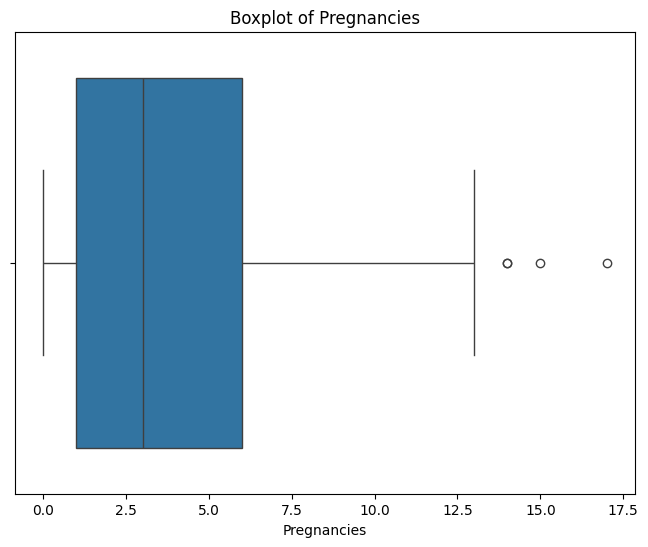

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Pregnancies'])
plt.title('Boxplot of Pregnancies')
plt.show()

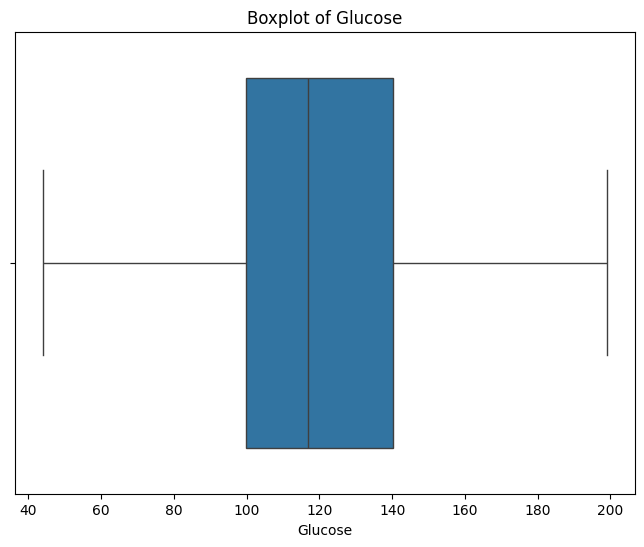

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Glucose'])
plt.title('Boxplot of Glucose')
plt.show()

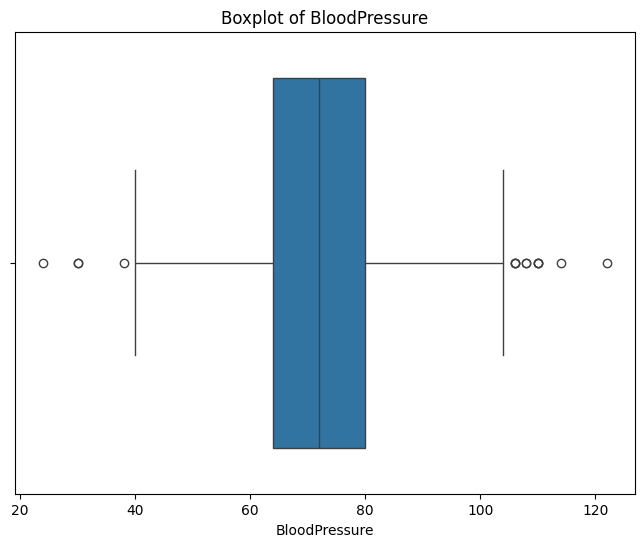

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['BloodPressure'])
plt.title('Boxplot of BloodPressure')
plt.show()

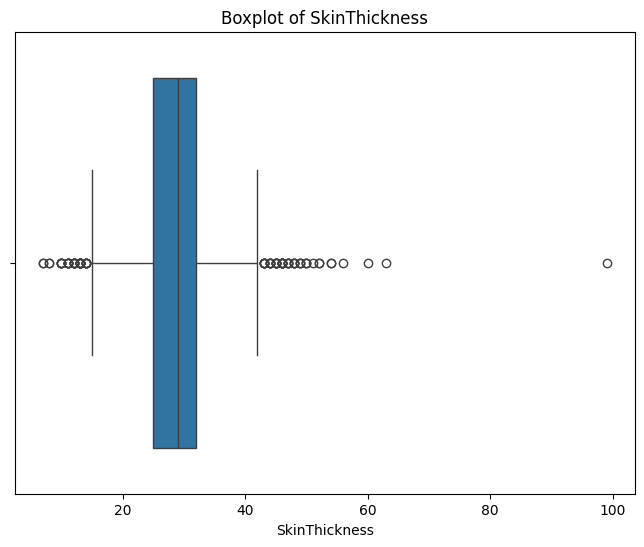

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['SkinThickness'])
plt.title('Boxplot of SkinThickness')
plt.show()

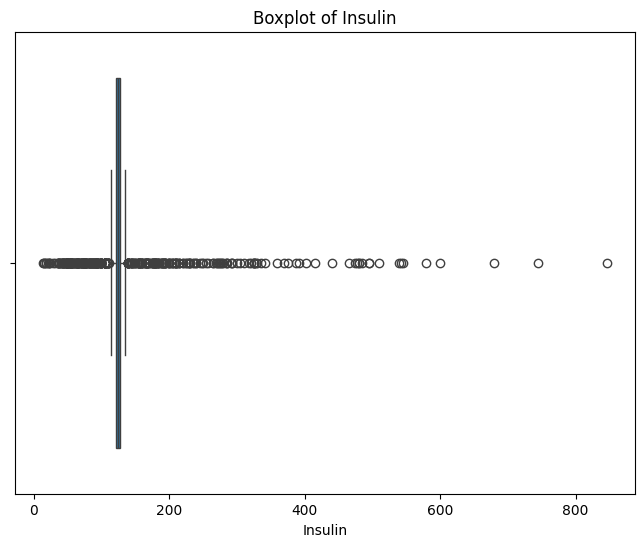

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Insulin'])
plt.title('Boxplot of Insulin')
plt.show()

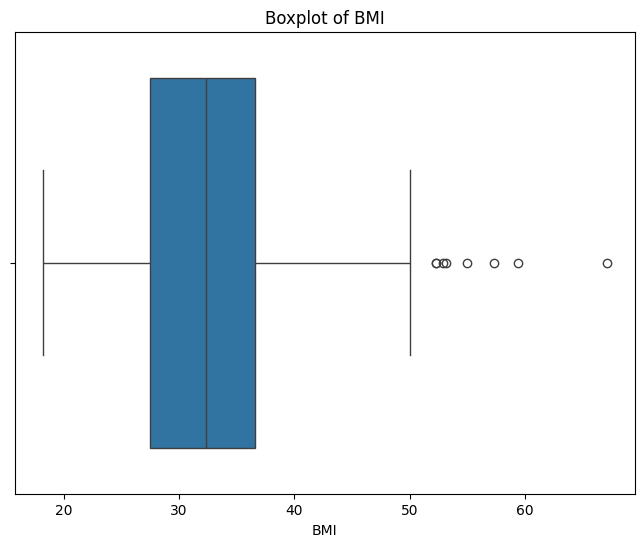

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['BMI'])
plt.title('Boxplot of BMI')
plt.show()

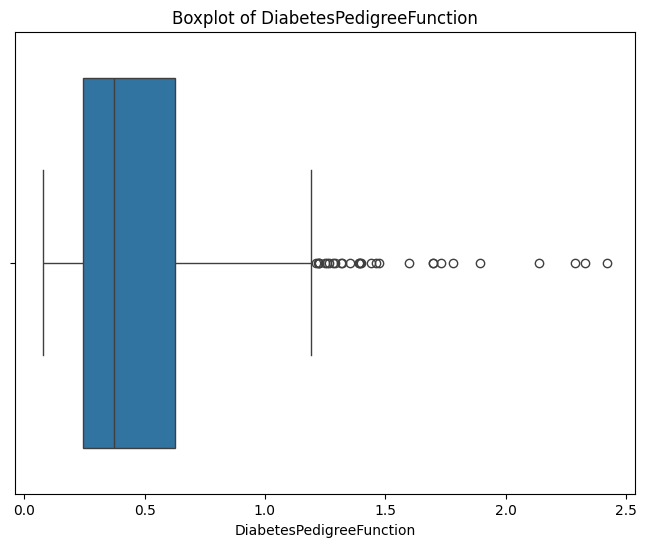

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.title('Boxplot of DiabetesPedigreeFunction')
plt.show()

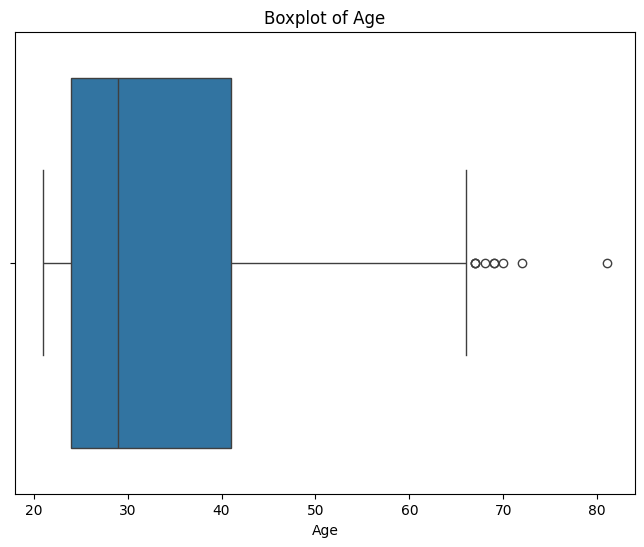

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

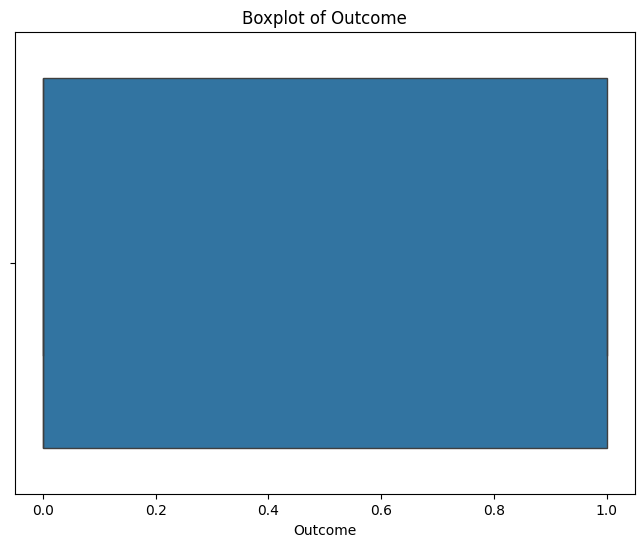

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Outcome'])
plt.title('Boxplot of Outcome')
plt.show()

## Numerical and target distribution

In [26]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

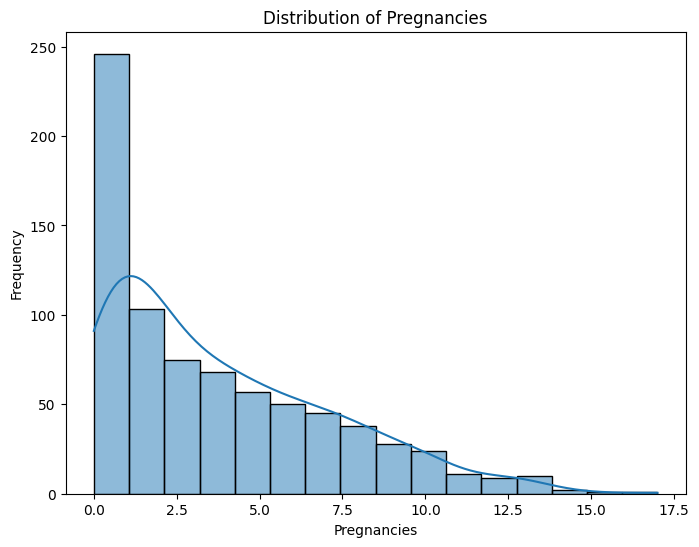

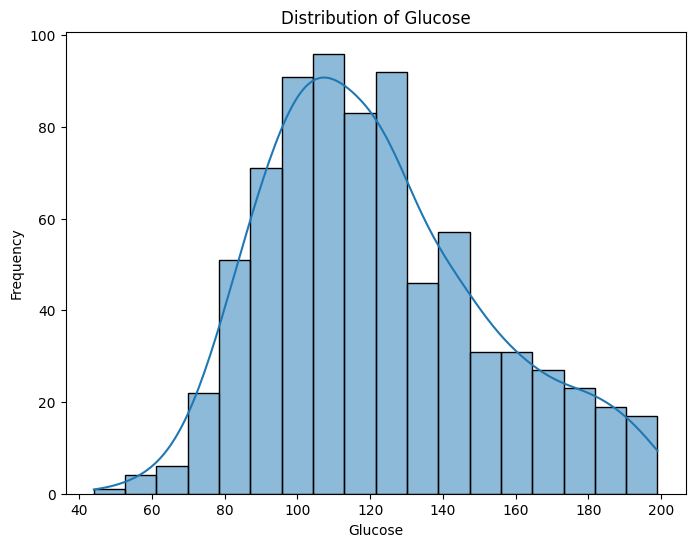

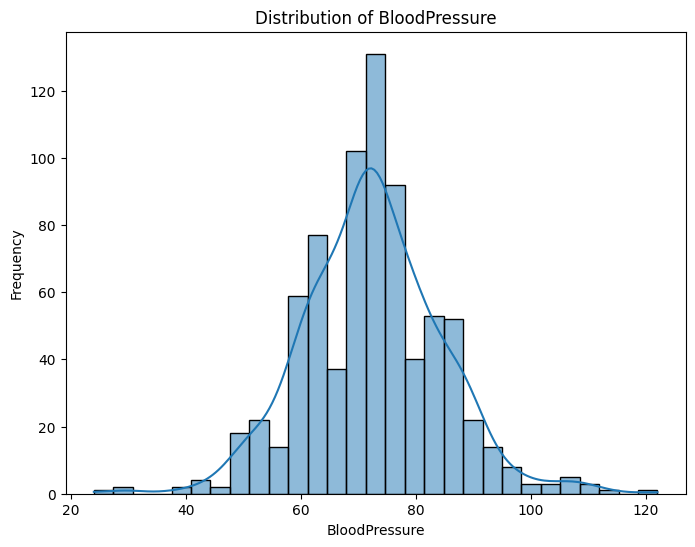

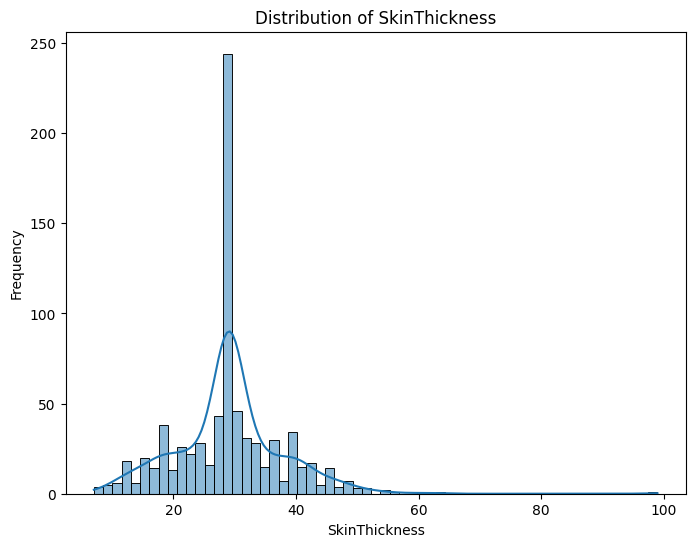

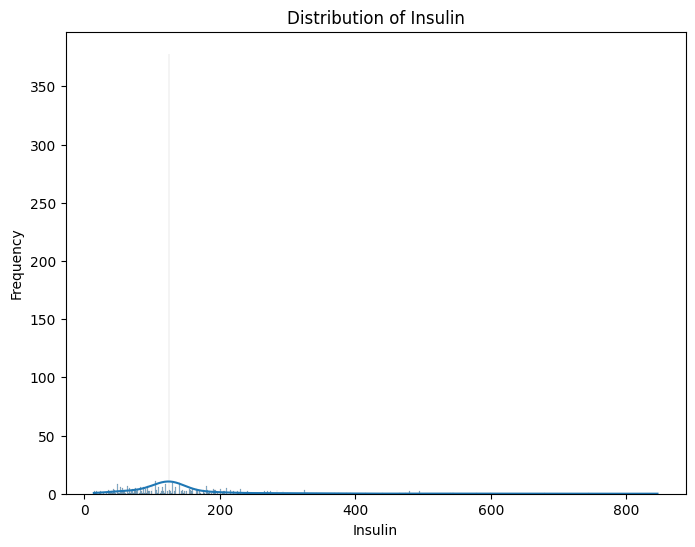

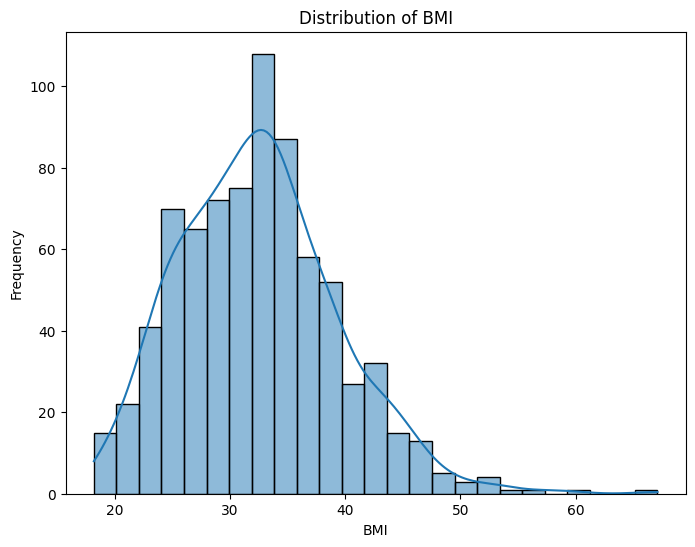

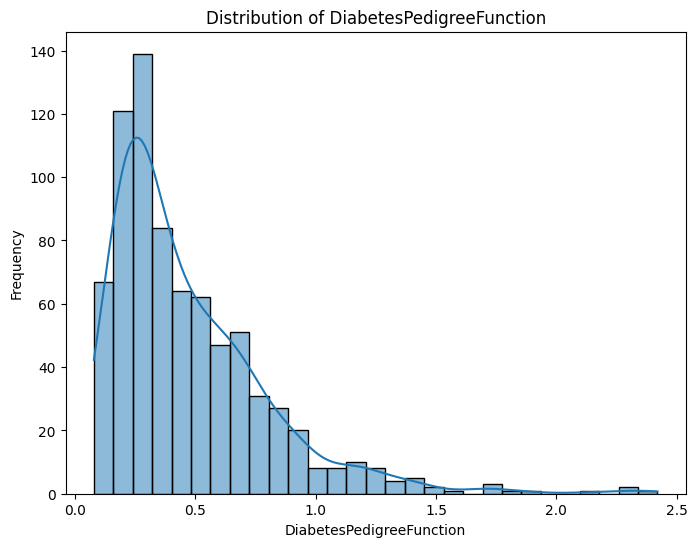

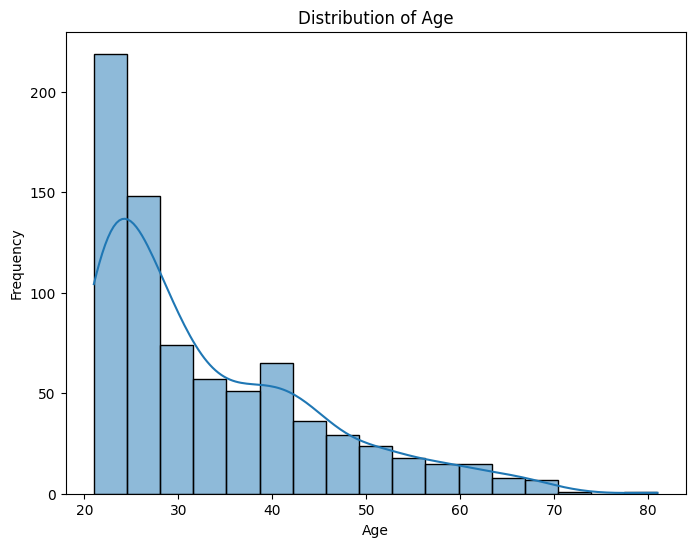

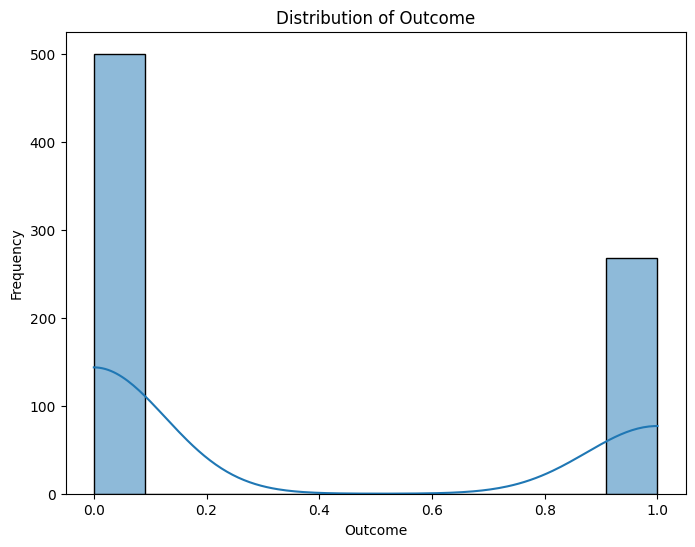

In [27]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

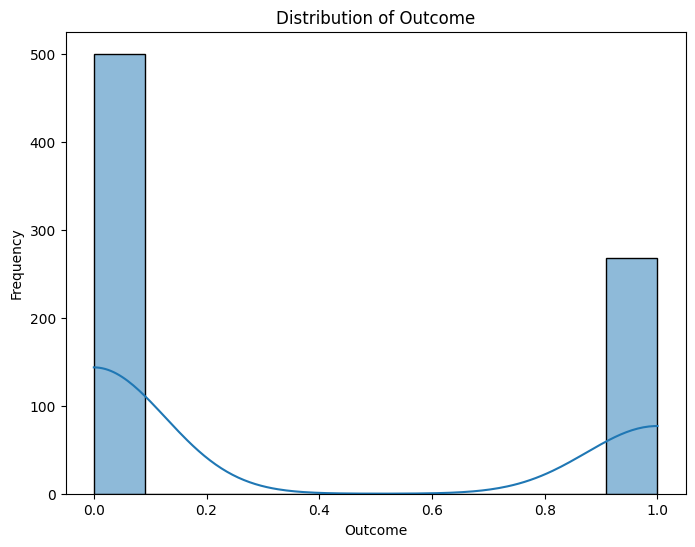

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Outcome'], kde=True)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

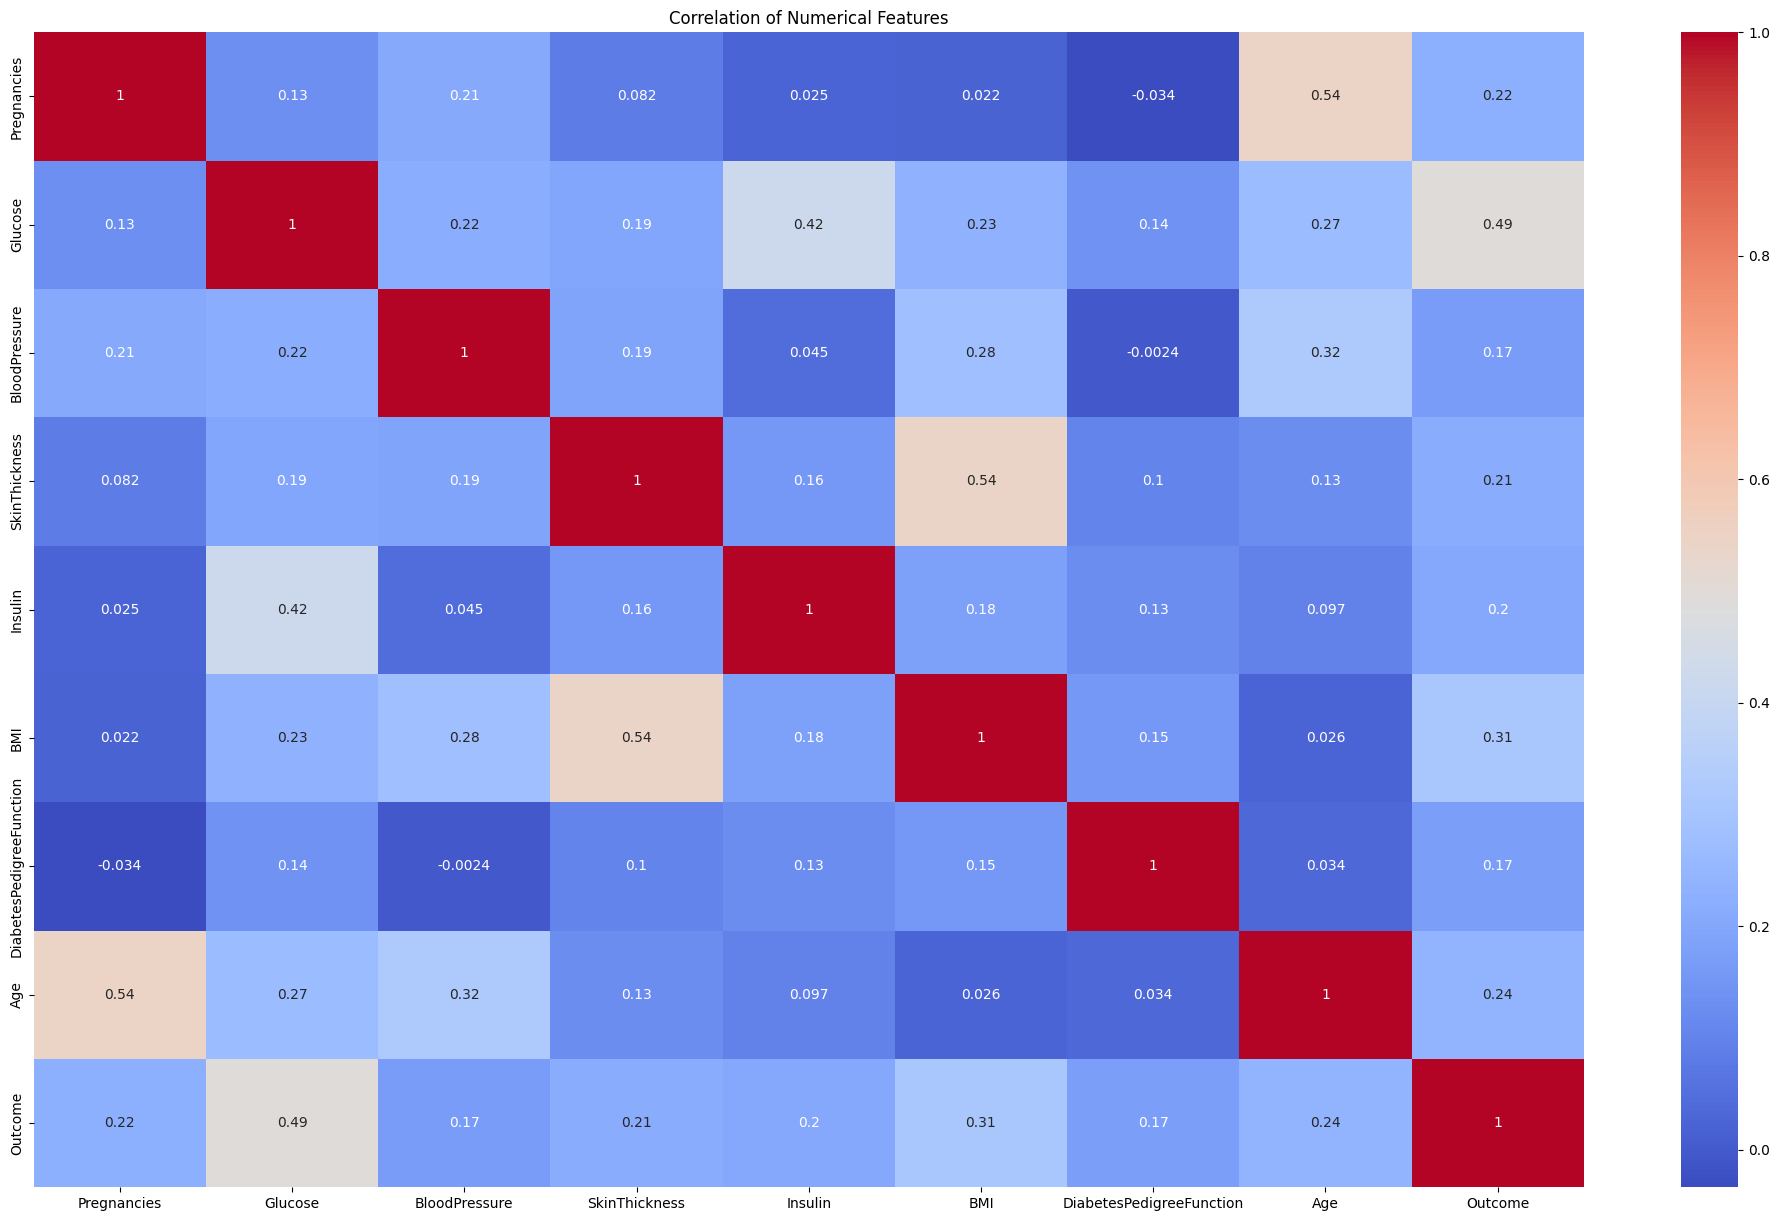

In [29]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features')
plt.show()

In [30]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

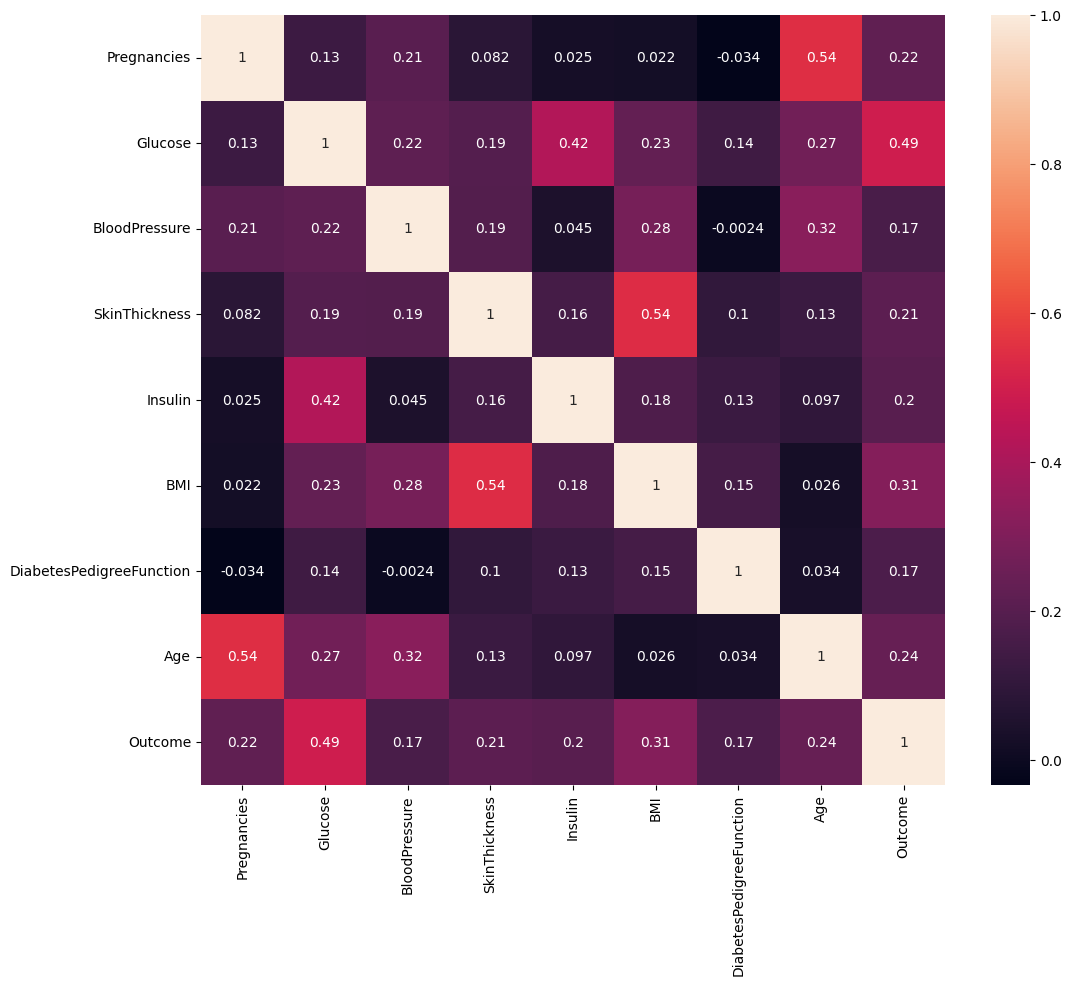

In [31]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

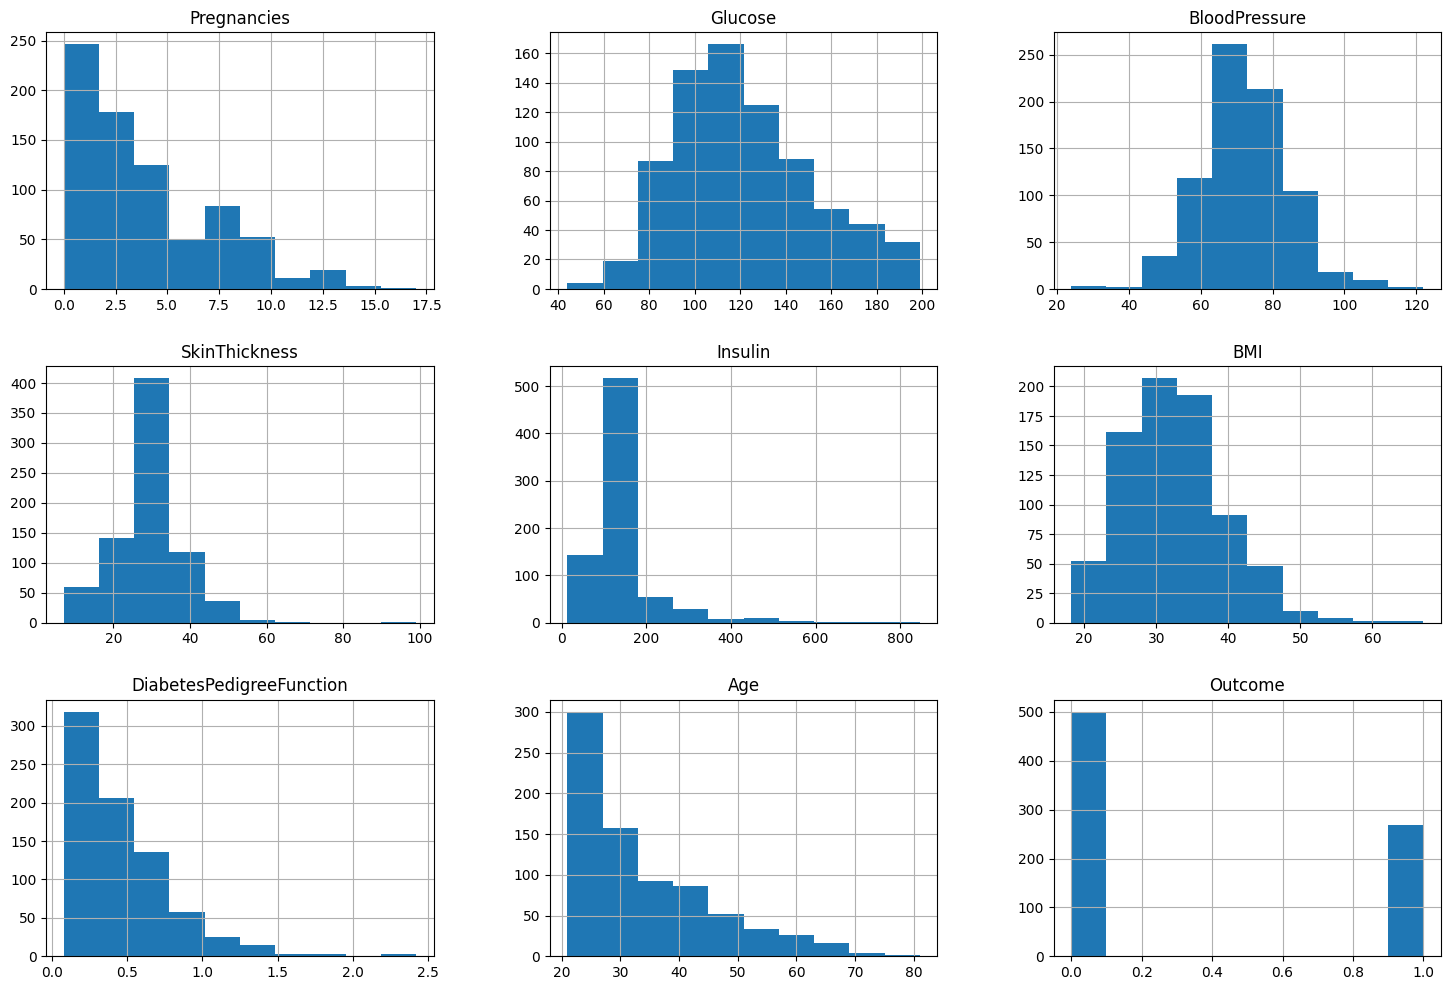

In [32]:
data.hist(figsize=(18,12))
plt.show()

<Axes: xlabel='SkinThickness'>

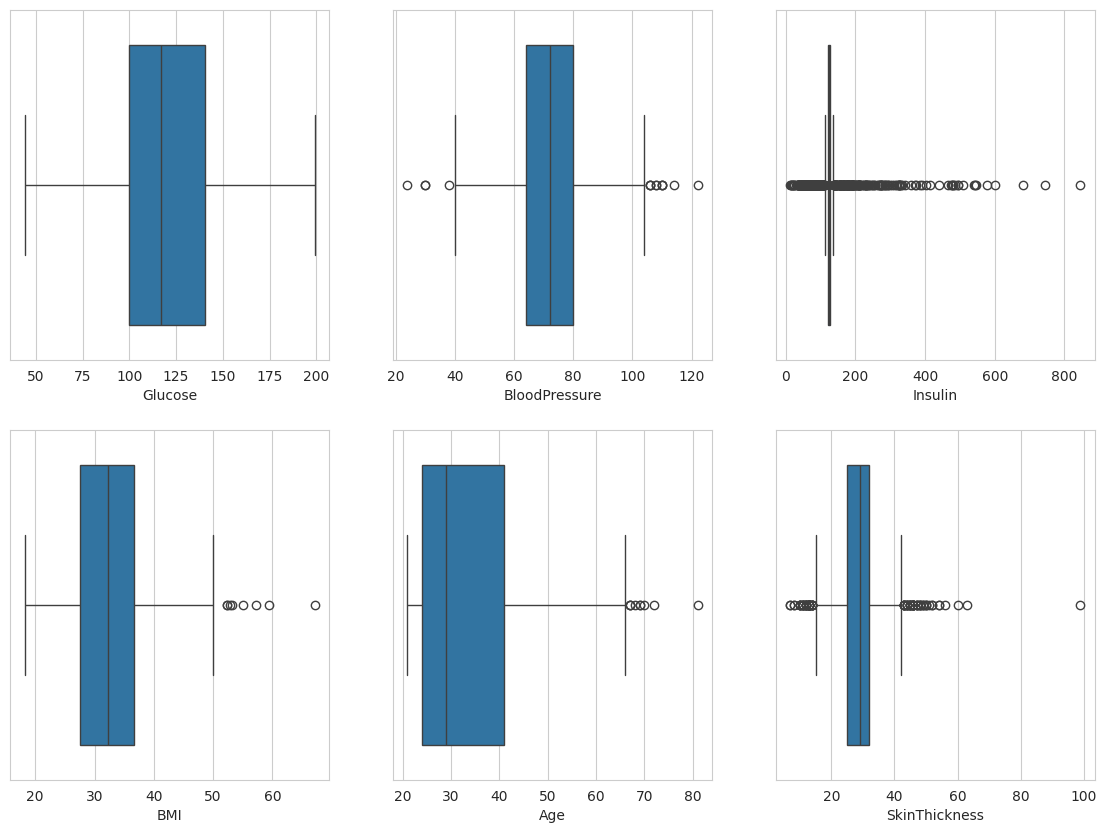

In [33]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

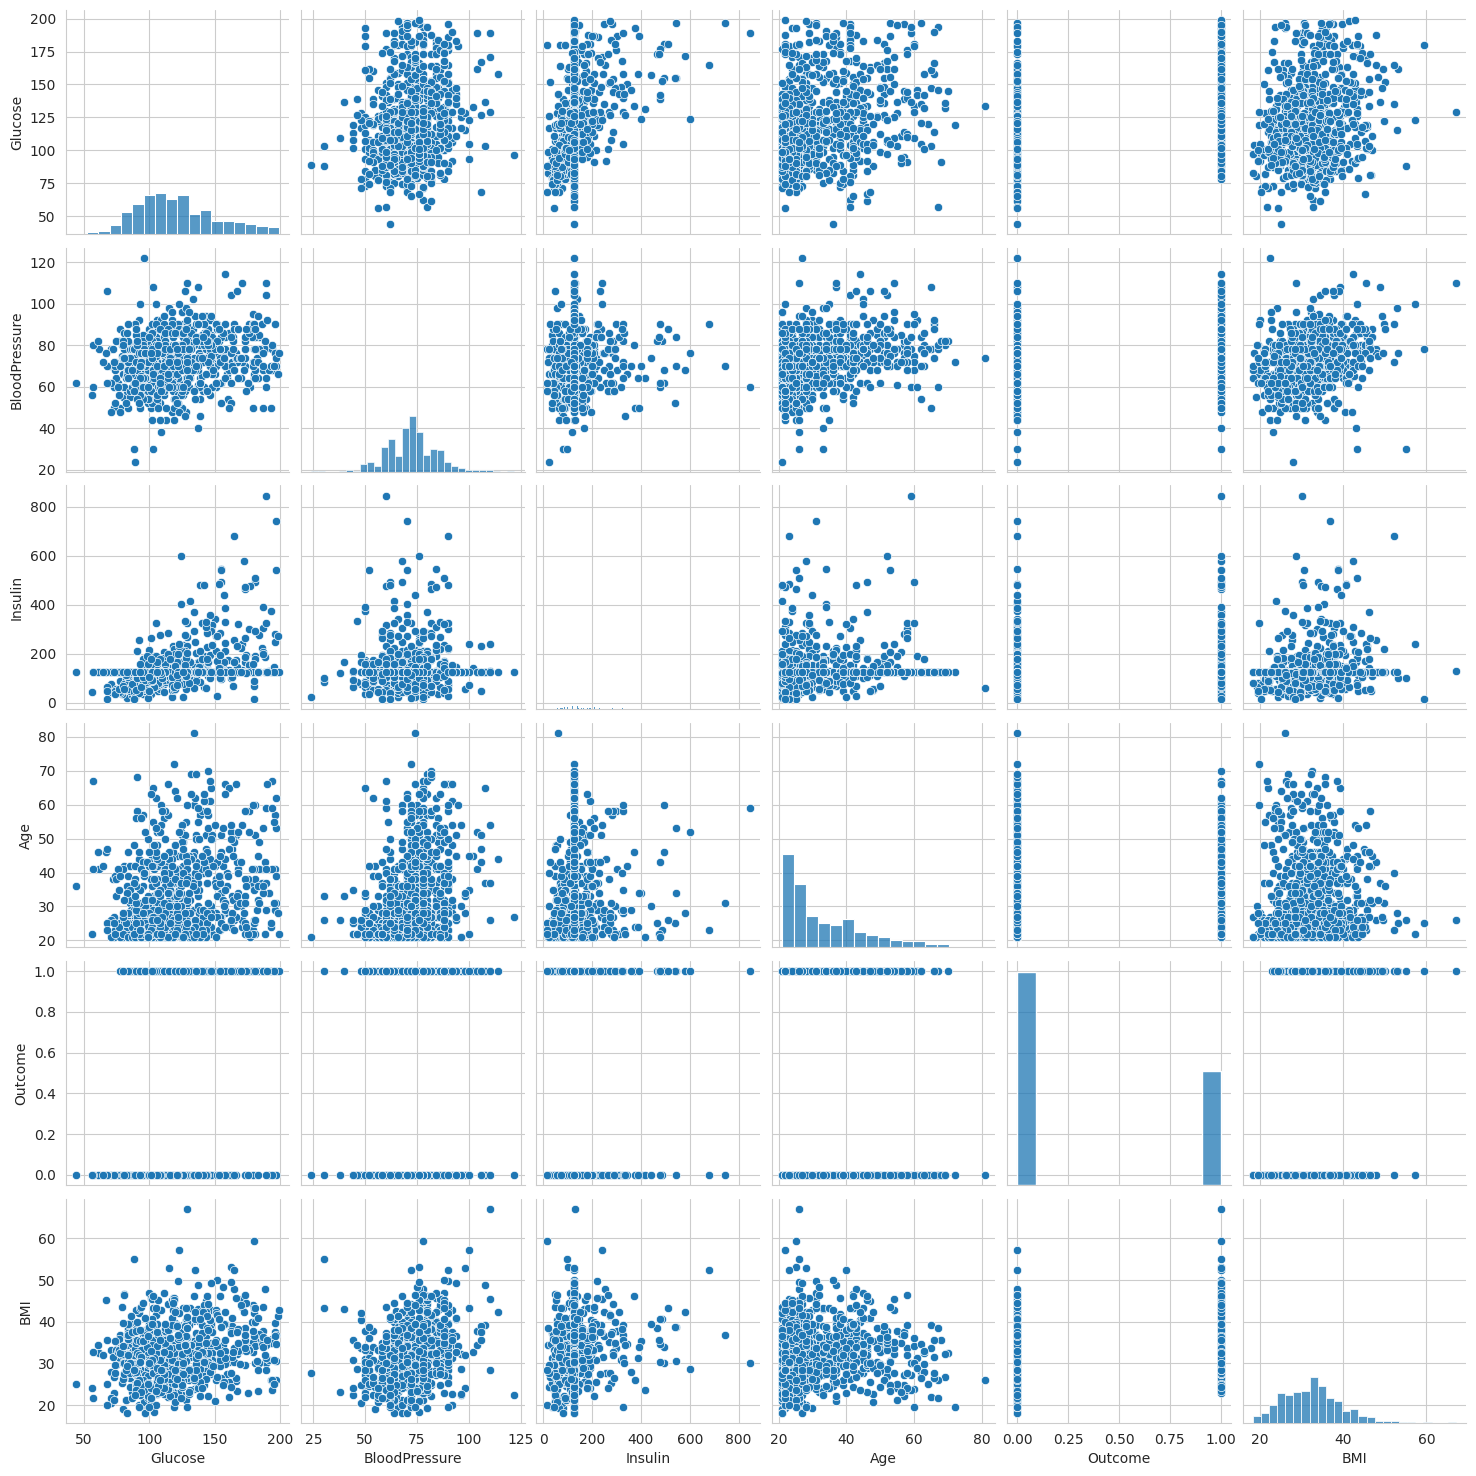

In [34]:
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(data[mean_col],palette='Accent')

<Axes: xlabel='Outcome', ylabel='Insulin'>

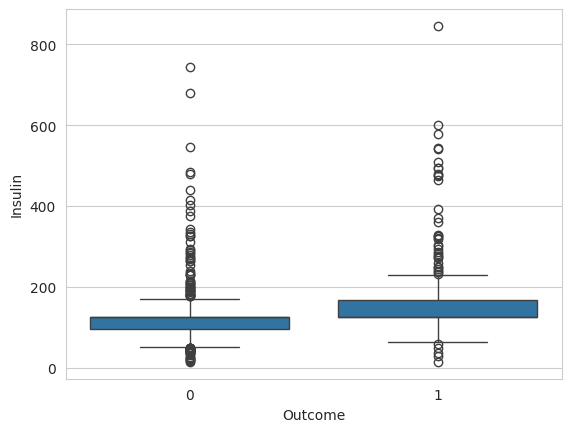

In [35]:
sns.boxplot(x='Outcome',y='Insulin',data=data)

<Axes: xlabel='BMI', ylabel='Glucose'>

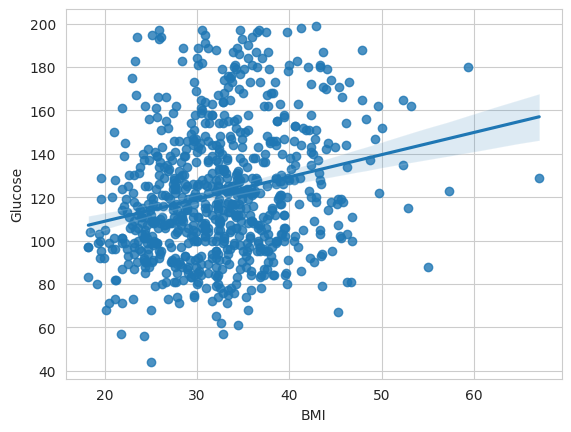

In [36]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

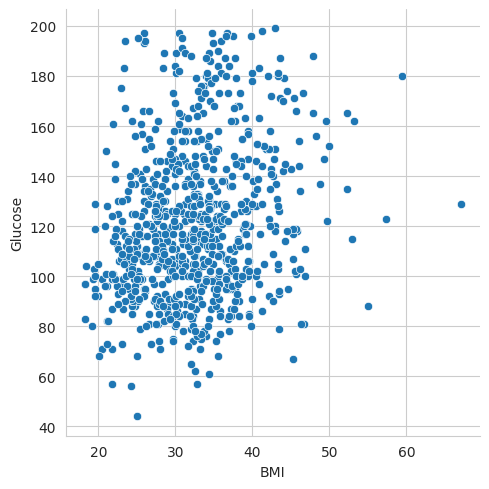

In [37]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

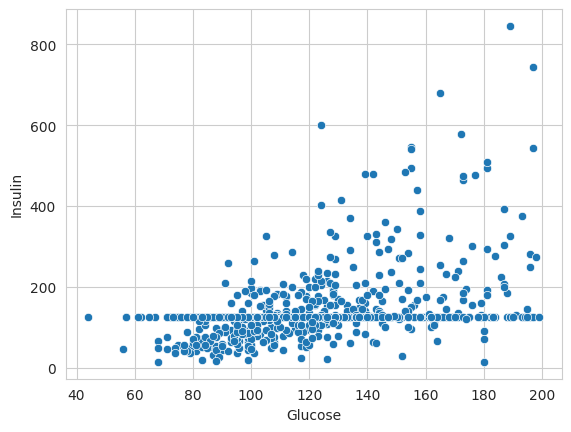

In [38]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

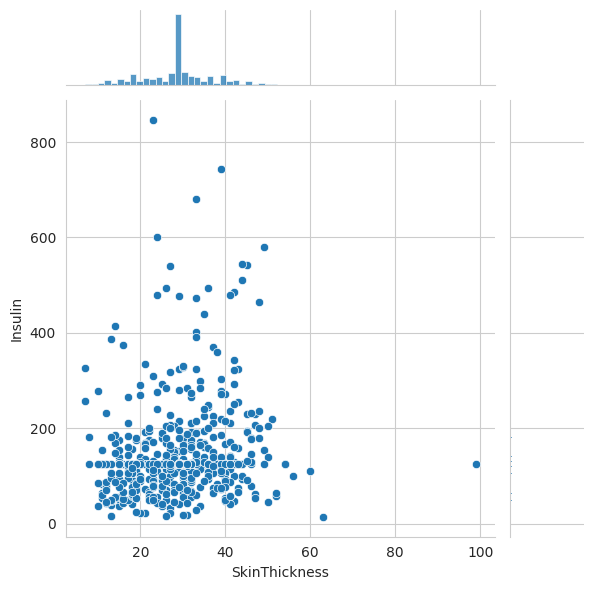

In [39]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

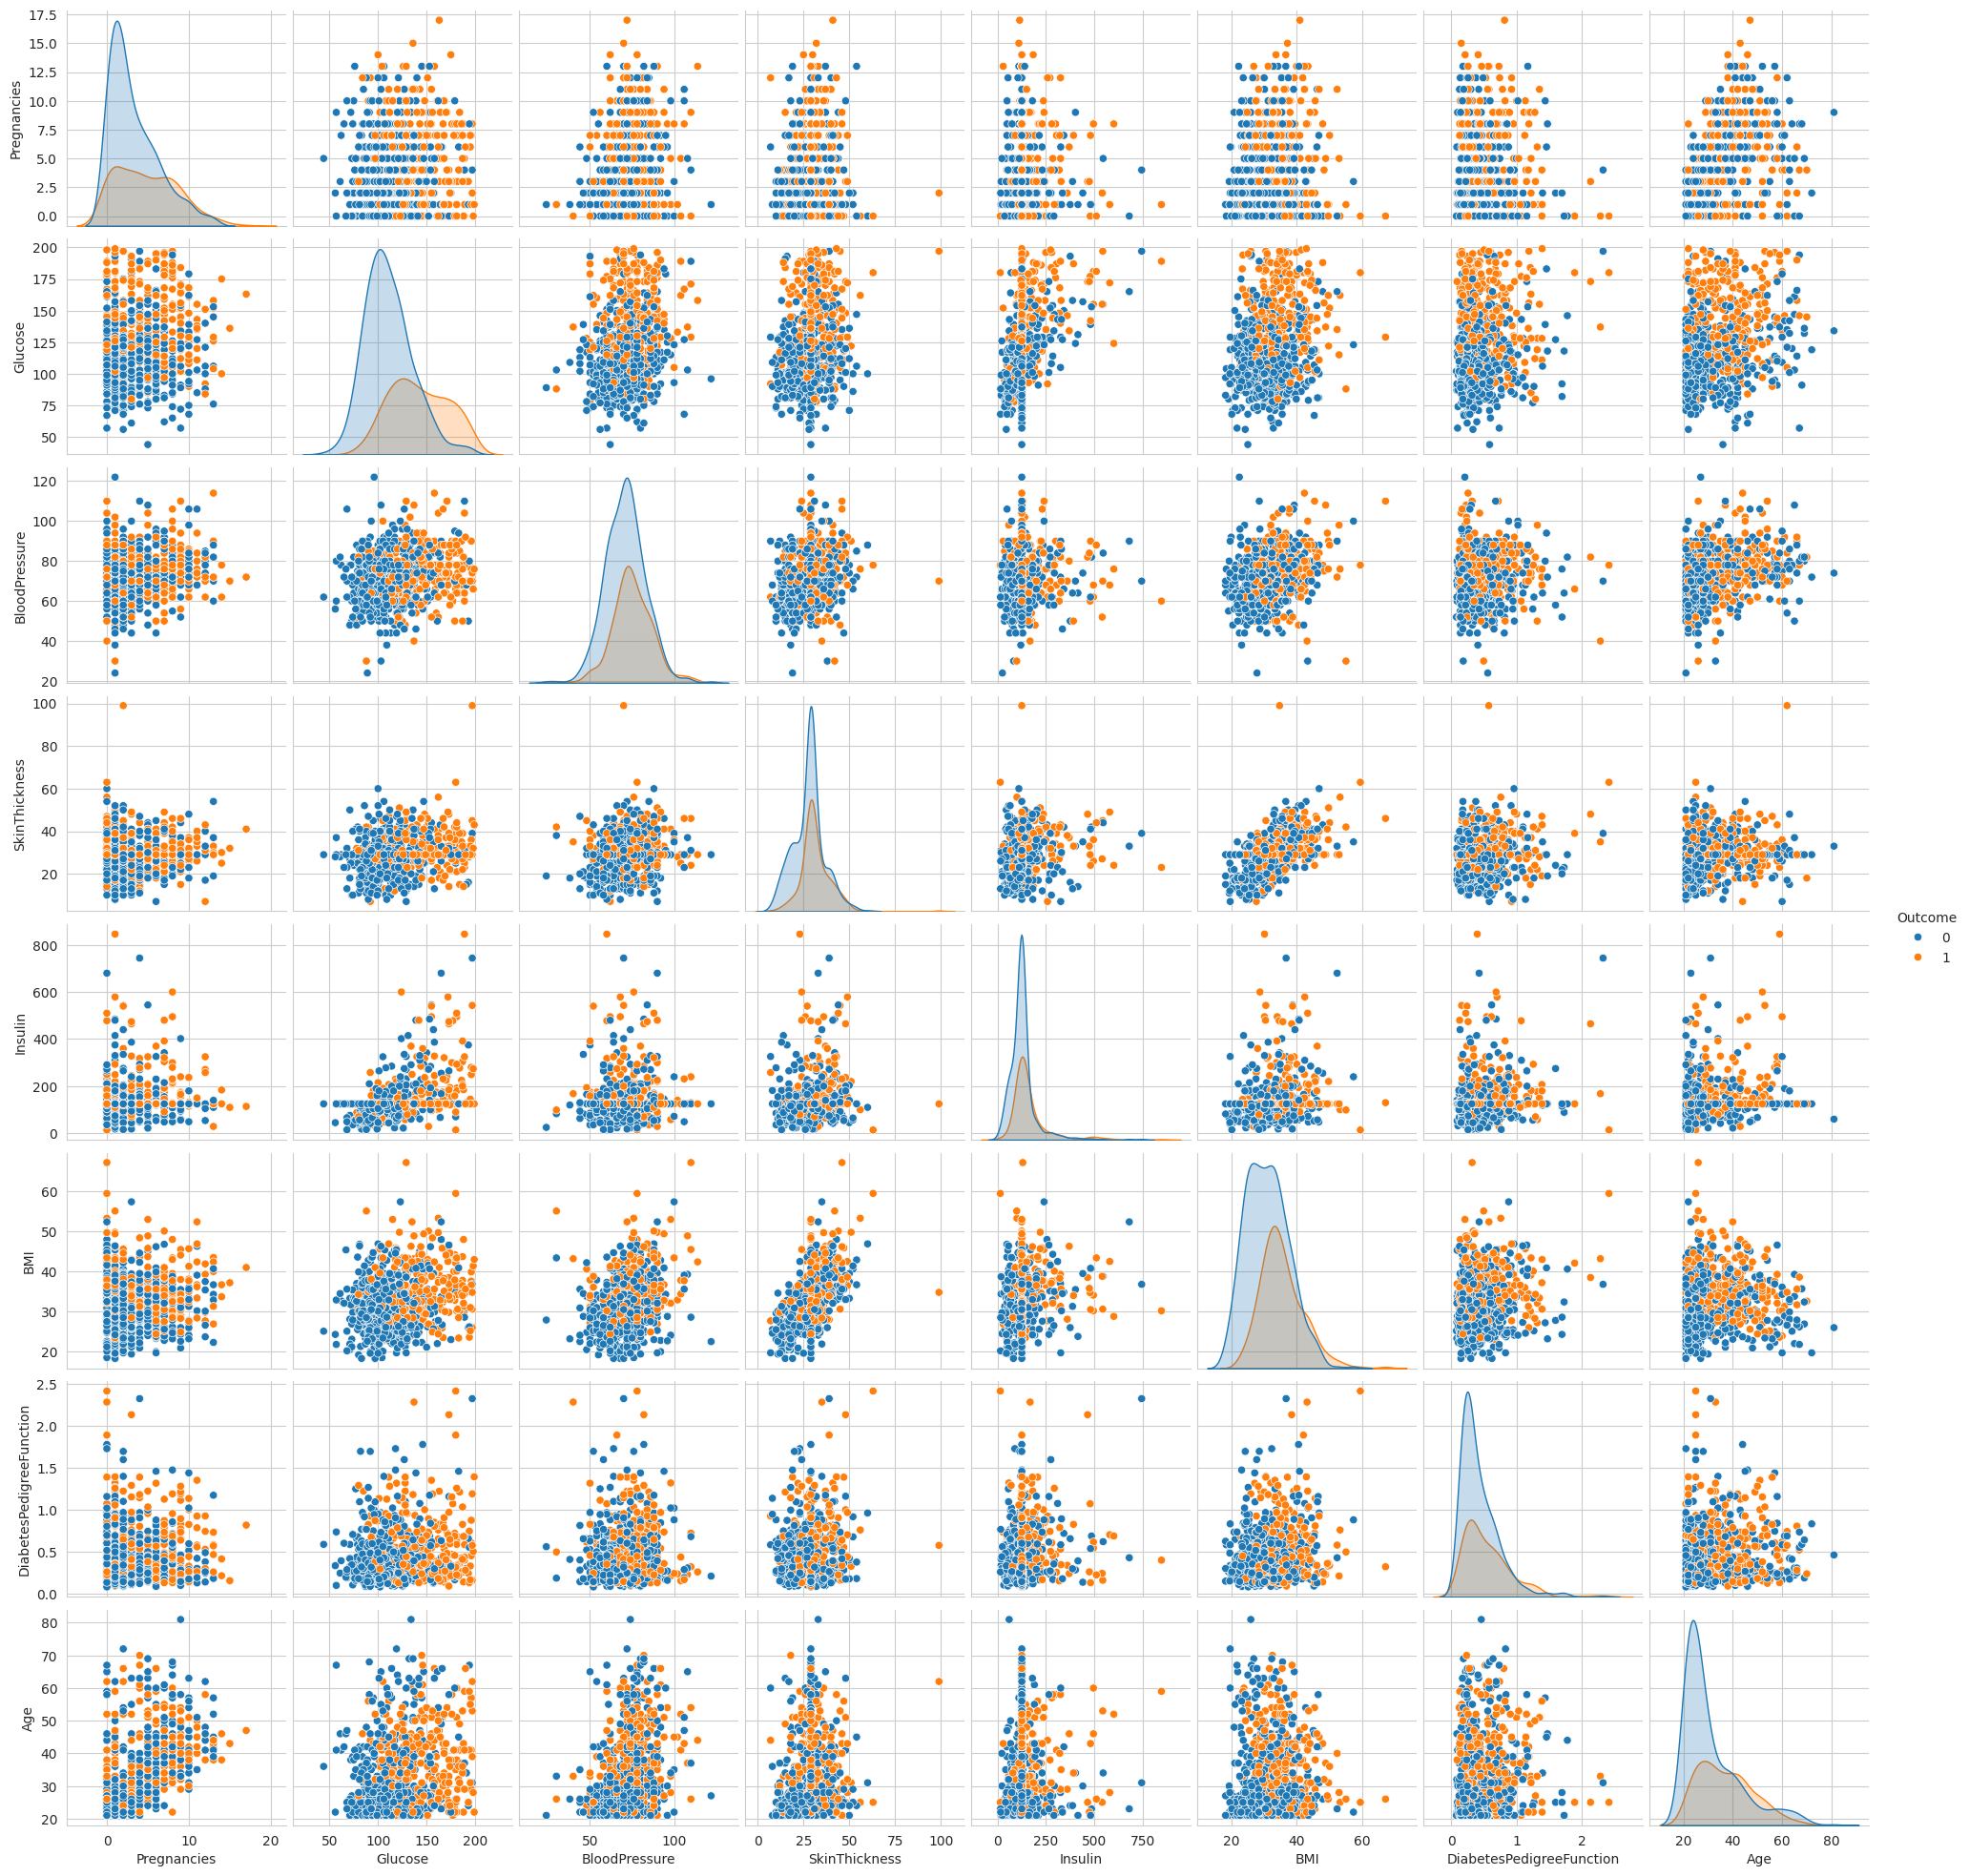

In [40]:
sns.pairplot(data,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

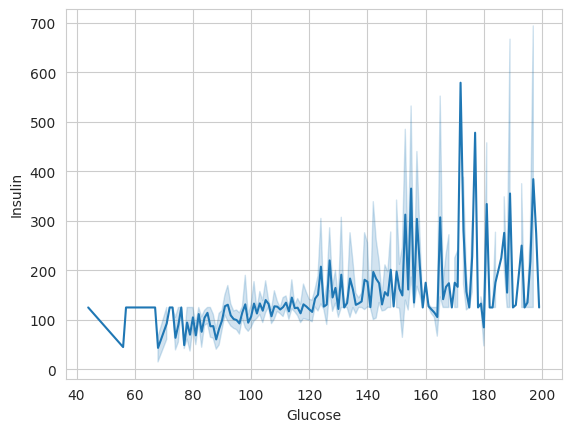

In [41]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

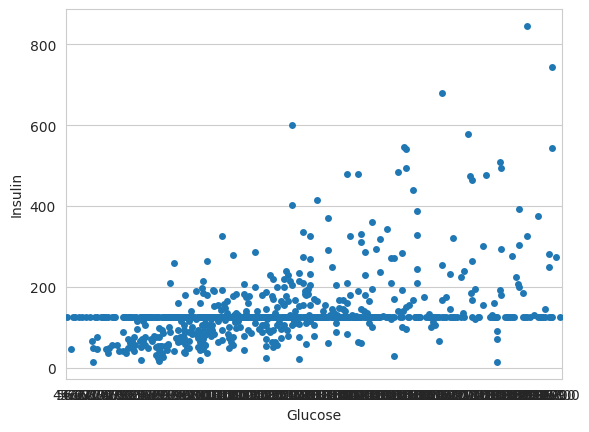

In [42]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

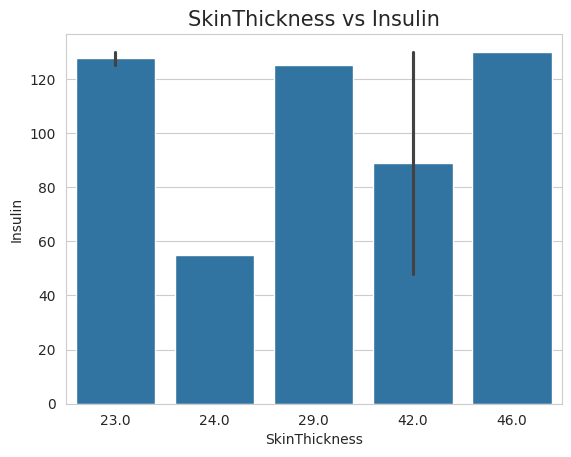

In [43]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

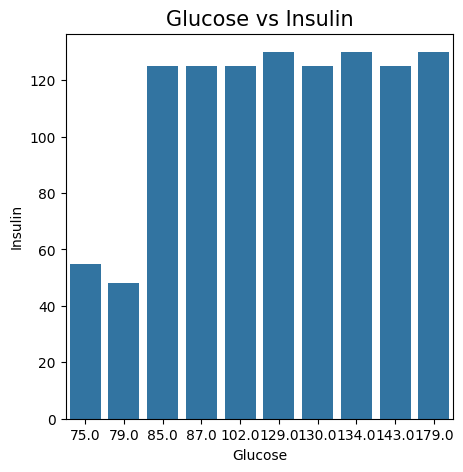

In [44]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

# Splitting TRAINING AND TESTING DATA

In [45]:
x = data.drop(columns = 'Outcome')

y = data['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


In [47]:
x_train.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.874593  121.657980      72.627036      29.219870  141.990228   
std       3.443637   30.265551      12.012608       8.844065   88.665104   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      25.000000  120.500000   
50%       3.000000  117.500000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      32.750000  130.000000   
max      17.000000  198.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  614.000000                614.000000  614.000000  
mean    32.627524                  0.466471   33.594463  
std      6.994391                  0.333203   12.016168  
min     18.200000                  0.078000   21.000000  
25%     27.600000                  0.238000   24.000000  
50%     32.400000                  0.369000   29.000000  
75%     36.775000                  0.606500   41.000000  
max     67.100000                  2.420000   81.000000

In [48]:
x_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Feature Selection

## Feature importnace for all features in your dataset using (Fisher’s Score)

In [49]:
fisher_selector = SelectKBest(score_func=f_classif, k='all')
fisher_selector.fit(x_train, y_train)

fisher_scores = fisher_selector.scores_

feature_names = list(x_train.columns)

feature_importance = sorted(zip(feature_names, fisher_scores), key=lambda x: x[1], reverse=True)

print("Top 4 Most Important Features Based on Fisher’s Score:")
for feature, score in feature_importance[:4]:
    print(f"{feature}: {score:.4f}")

Top 4 Most Important Features Based on Fisher’s Score:
Glucose: 193.4375
BMI: 67.1005
Age: 37.0713
Pregnancies: 23.9317


## Feature importnace for all features in your dataset using (Correlation Coefficient)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_train_df = pd.DataFrame(X_train_scaled, columns=x_train.columns)
correlation_scores = X_train_df.corrwith(pd.Series(y_train))
feature_importance = correlation_scores.abs().sort_values(ascending=False)

print("Feature Importance based on Correlation Coefficient:")
for feature, score in feature_importance.items():
    print(f"{feature}: {score:.4f}")

Feature Importance based on Correlation Coefficient:
Pregnancies: 0.0652
SkinThickness: 0.0449
DiabetesPedigreeFunction: 0.0382
Age: 0.0308
Glucose: 0.0238
Insulin: 0.0201
BloodPressure: 0.0150
BMI: 0.0077


## Feature importnace for all features in your dataset using (Variance Threshold)

In [51]:
X_train_df = pd.DataFrame(X_train_scaled, columns=[f'Feature {i}' for i in range(X_train_scaled.shape[1])])
thresholds = [0.01, 0.05, 0.1]

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_train_df)

    selected_features = X_train_df.columns[selector.get_support()]
    print(f"\n### Features Selected with Variance Threshold = {threshold}")
    print(f"Number of Features Selected: {len(selected_features)}")
    print(f"Selected Features: {list(selected_features)}")


### Features Selected with Variance Threshold = 0.01
Number of Features Selected: 8
Selected Features: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']

### Features Selected with Variance Threshold = 0.05
Number of Features Selected: 8
Selected Features: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']

### Features Selected with Variance Threshold = 0.1
Number of Features Selected: 8
Selected Features: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']


## Features that are dependent on each other


### Highly Correlated Feature Pairs (|correlation| > 0.8) ###
No highly correlated features found.


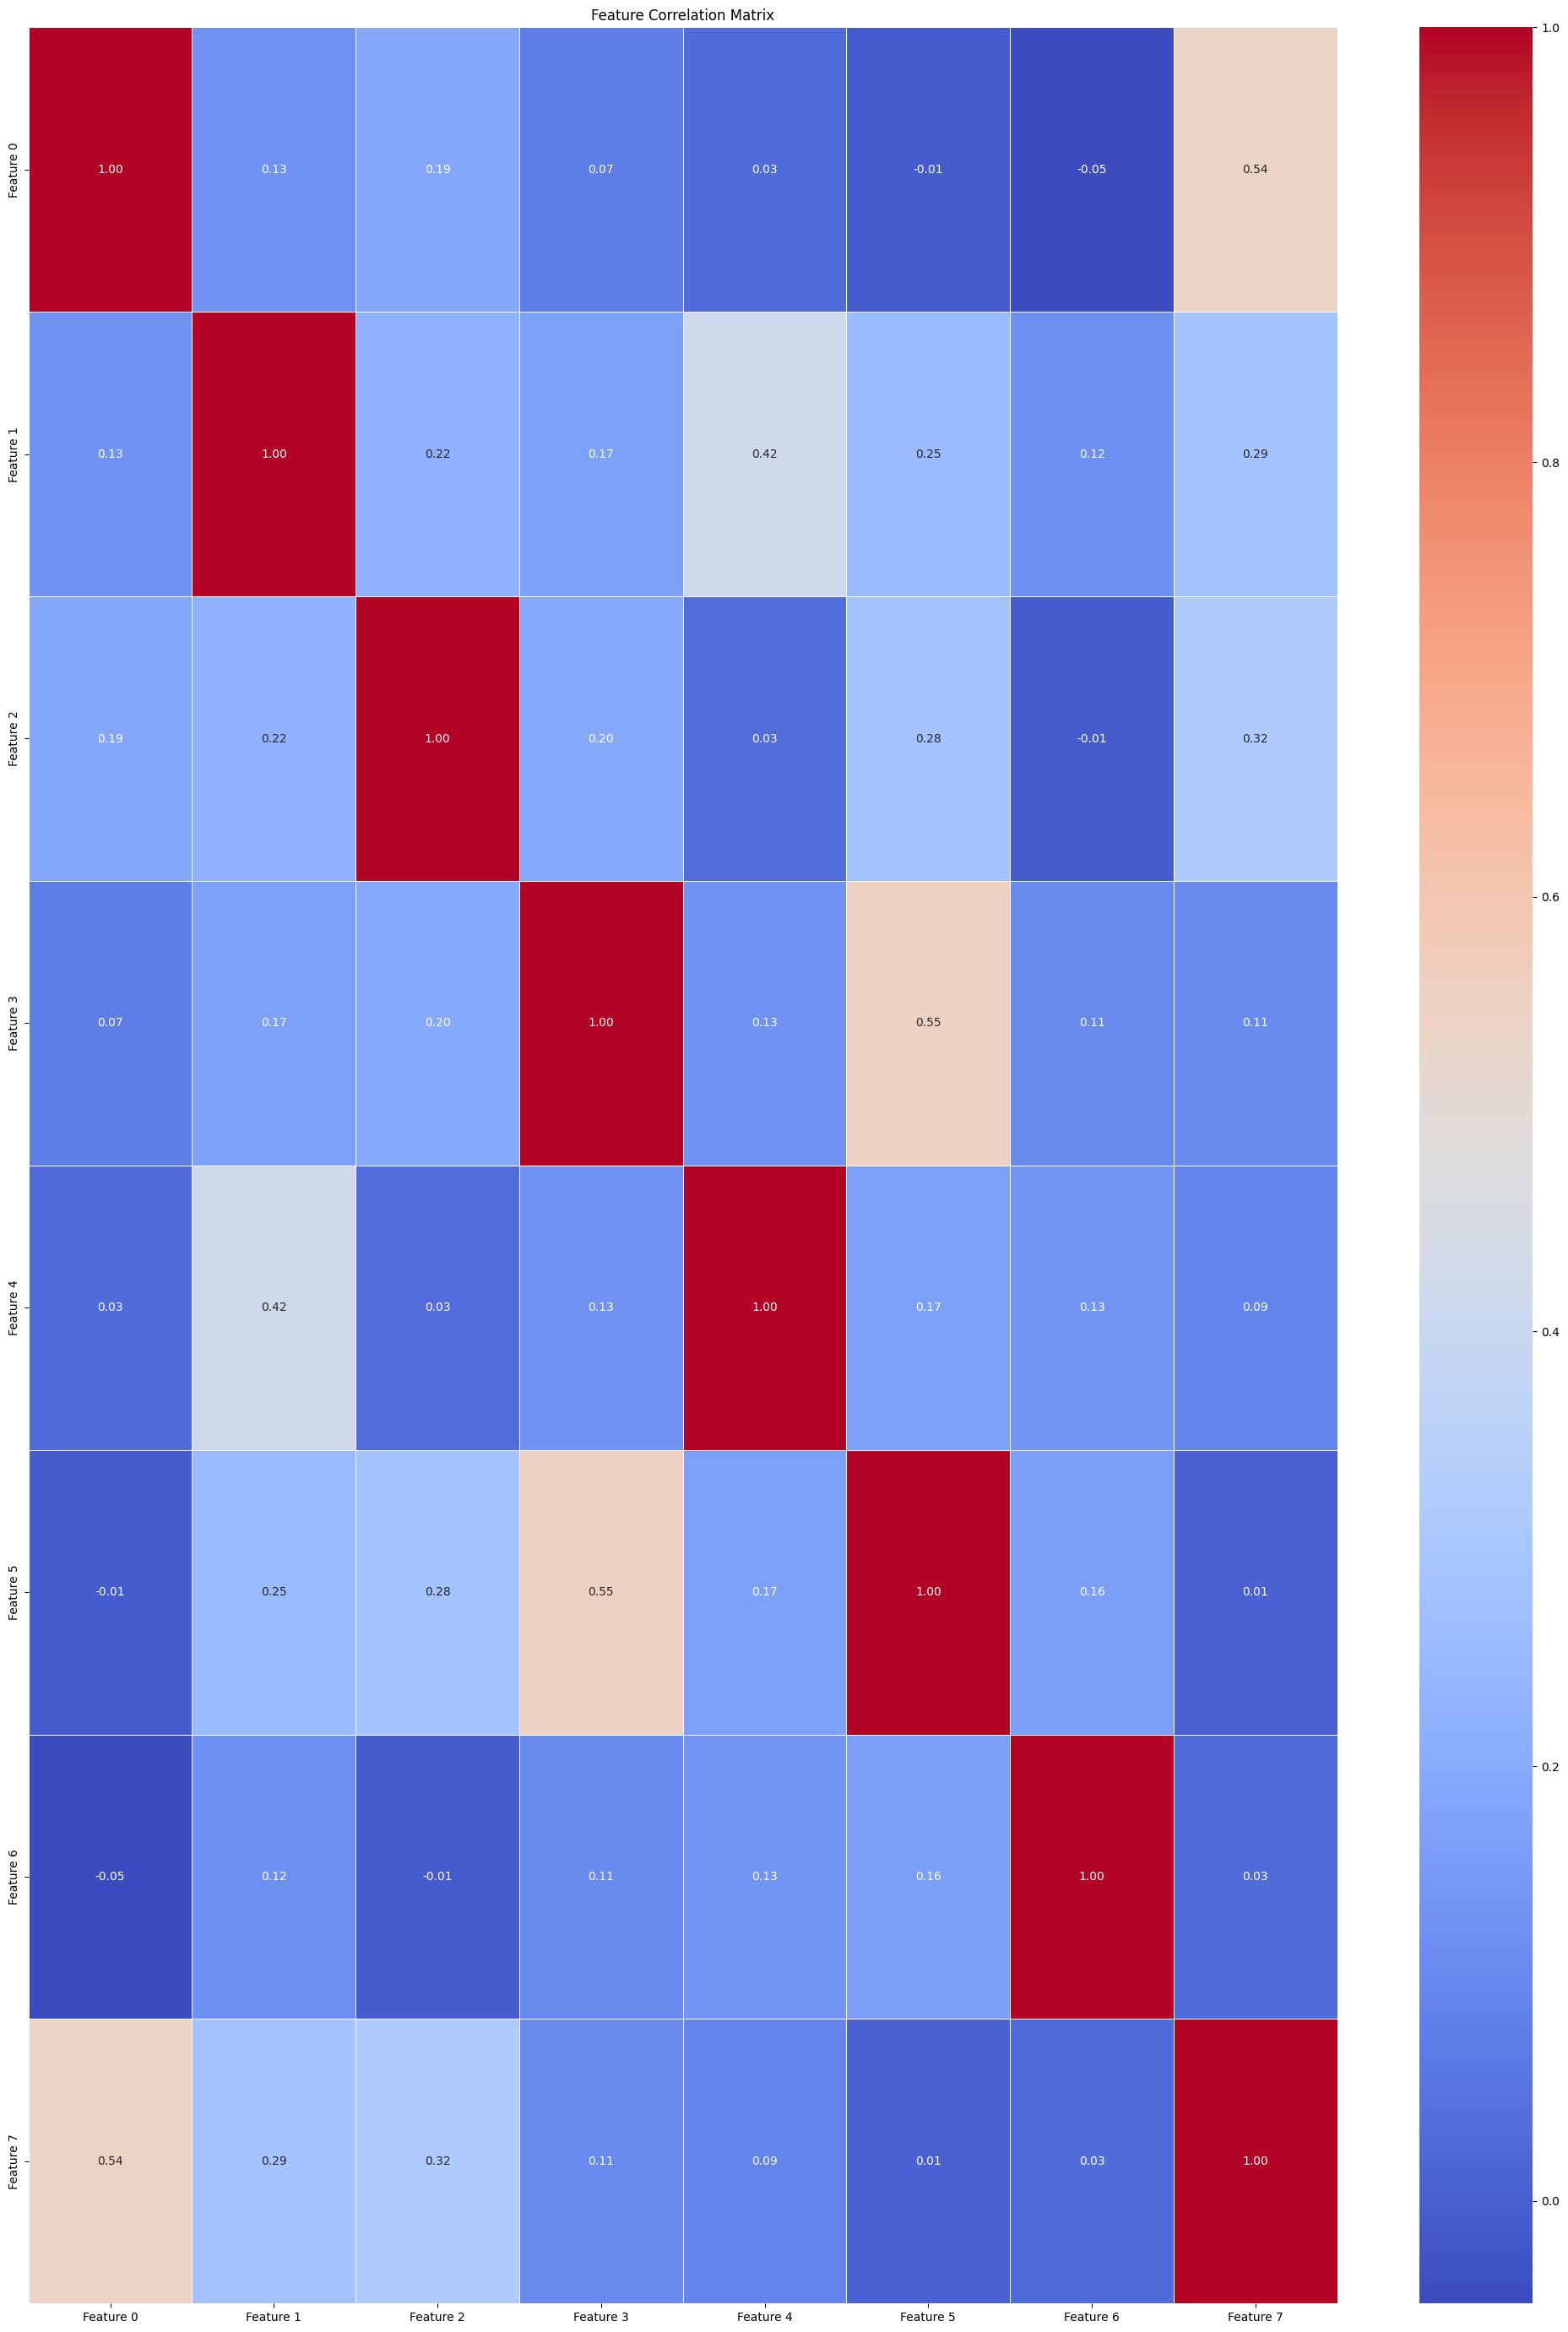

In [52]:
X_train_df = pd.DataFrame(X_train_scaled, columns=[f'Feature {i}' for i in range(X_train_scaled.shape[1])])

corr_matrix = X_train_df.corr()

threshold = 0.8
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\n### Highly Correlated Feature Pairs (|correlation| > 0.8) ###")
if high_corr_features:
    for feature1, feature2, corr_value in high_corr_features:
        print(f"{feature1} ↔ {feature2}: {corr_value:.2f}")
else:
    print("No highly correlated features found.")


plt.figure(figsize=(25, 35))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## The most correlated 3 features with it using Chi-squre Test Scores.

In [53]:
target_variable = 'Outcome'

chi2_scores = []
for feature in data.columns:
    if feature != target_variable:
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_scores.append((feature, chi2))

chi2_scores.sort(key=lambda x: x[1], reverse=True)

top_3_features = chi2_scores[:3]

print("Top 3 features with highest Chi-square test scores:")
for feature, score in top_3_features:
    print(f"{feature}: {score}")

Top 3 features with highest Chi-square test scores:
DiabetesPedigreeFunction: 533.0240955223882
BMI: 279.52475827456124
Glucose: 269.01296827842924


## Backward Elemination Feature Selection

In [54]:
def backward_elimination(X, y, p_threshold=0.05, vif_threshold=10):
    X = sm.add_constant(X)
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues.iloc[1:]
        VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        max_p_value = p_values.max()
        if max_p_value > p_threshold:
            feature_to_remove = p_values.idxmax()
            print(f"Removing {feature_to_remove} due to high p-value: {max_p_value:.5f}")
            X = X.drop(columns=[feature_to_remove])
            continue

        vif_values = dict(zip(X.columns, VIF))
        high_vif = {k: v for k, v in vif_values.items() if v > vif_threshold and k != 'const'}

        if high_vif:
            feature_to_remove = max(high_vif, key=high_vif.get)
            print(f"Removing {feature_to_remove} due to high VIF: {high_vif[feature_to_remove]:.2f}")
            X = X.drop(columns=[feature_to_remove])
            continue

        break

    return X, model.summary()

X_selected, model_summary = backward_elimination(x, y)
print(model_summary)

Removing SkinThickness due to high p-value: 0.92182
Removing Insulin due to high p-value: 0.39715
Removing BloodPressure due to high p-value: 0.38737
Removing Age due to high p-value: 0.23833
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     89.22
Date:                Thu, 01 May 2025   Prob (F-statistic):           3.24e-62
Time:                        15:33:58   Log-Likelihood:                -373.31
No. Observations:                 768   AIC:                             756.6
Df Residuals:                     763   BIC:                             779.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  

In [55]:
def calculate_vif(x):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data

def backward_elimination(x, y, p_threshold=0.05, vif_threshold=10):
    x = sm.add_constant(x)
    while True:
        model = sm.OLS(y, x).fit()
        p_values = model.pvalues.iloc[1:]

        vif = calculate_vif(x).set_index("Feature")["VIF"]

        max_p_value = p_values.max()
        if max_p_value > p_threshold:
            feature_to_remove = p_values.idxmax()
            print(f"Removing {feature_to_remove} due to high p-value: {max_p_value:.5f}")
            x = x.drop(columns=[feature_to_remove])
            continue

        high_vif = vif[vif > vif_threshold].drop("const", errors="ignore")
        if not high_vif.empty:
            feature_to_remove = high_vif.idxmax()
            print(f"Removing {feature_to_remove} due to high VIF: {high_vif[feature_to_remove]:.2f}")
            x = x.drop(columns=[feature_to_remove])
            continue

        break

    return x, model

x = sm.add_constant(x)
model_initial = sm.OLS(y, x).fit()
print("Initial Model Summary:")
print(model_initial.summary())

print("\nFeature Significance Analysis:")
feature_analysis = pd.DataFrame({"Feature": x.columns, "P-value": model_initial.pvalues, "Z-score": model_initial.params / model_initial.bse})
print(feature_analysis)

x_selected, model_selected = backward_elimination(x.drop(columns=['const']), y)

x_selected = sm.add_constant(x_selected)
final_model = sm.OLS(y, x_selected).fit()
print("\nFinal Model Summary (After Feature Selection):")
print(final_model.summary())

print("\nModel Performance Comparison:")
comparison = pd.DataFrame({
    "Metric": ["R-squared", "Adjusted R-squared", "Number of Features"],
    "Initial Model": [model_initial.rsquared, model_initial.rsquared_adj, x.shape[1] - 1],
    "Final Model": [final_model.rsquared, final_model.rsquared_adj, x_selected.shape[1] - 1]
})
print(comparison)

Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     44.90
Date:                Thu, 01 May 2025   Prob (F-statistic):           4.25e-59
Time:                        15:33:58   Log-Likelihood:                -371.86
No. Observations:                 768   AIC:                             761.7
Df Residuals:                     759   BIC:                             803.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
c

# Zeyad_Sherif--202201220

## 2. Decision Tree

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [57]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [58]:
y_pred=dtree.predict(x_test)

In [59]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.62      0.49      0.55        47

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix:
 [[93 14]
 [24 23]]
Training Score:
 82.41042345276874
Mean Squared Error:
 0.24675324675324675
R2 score is:
 -0.16365082521376006


In [60]:
print(accuracy_score(y_test,y_pred)*100)

75.32467532467533


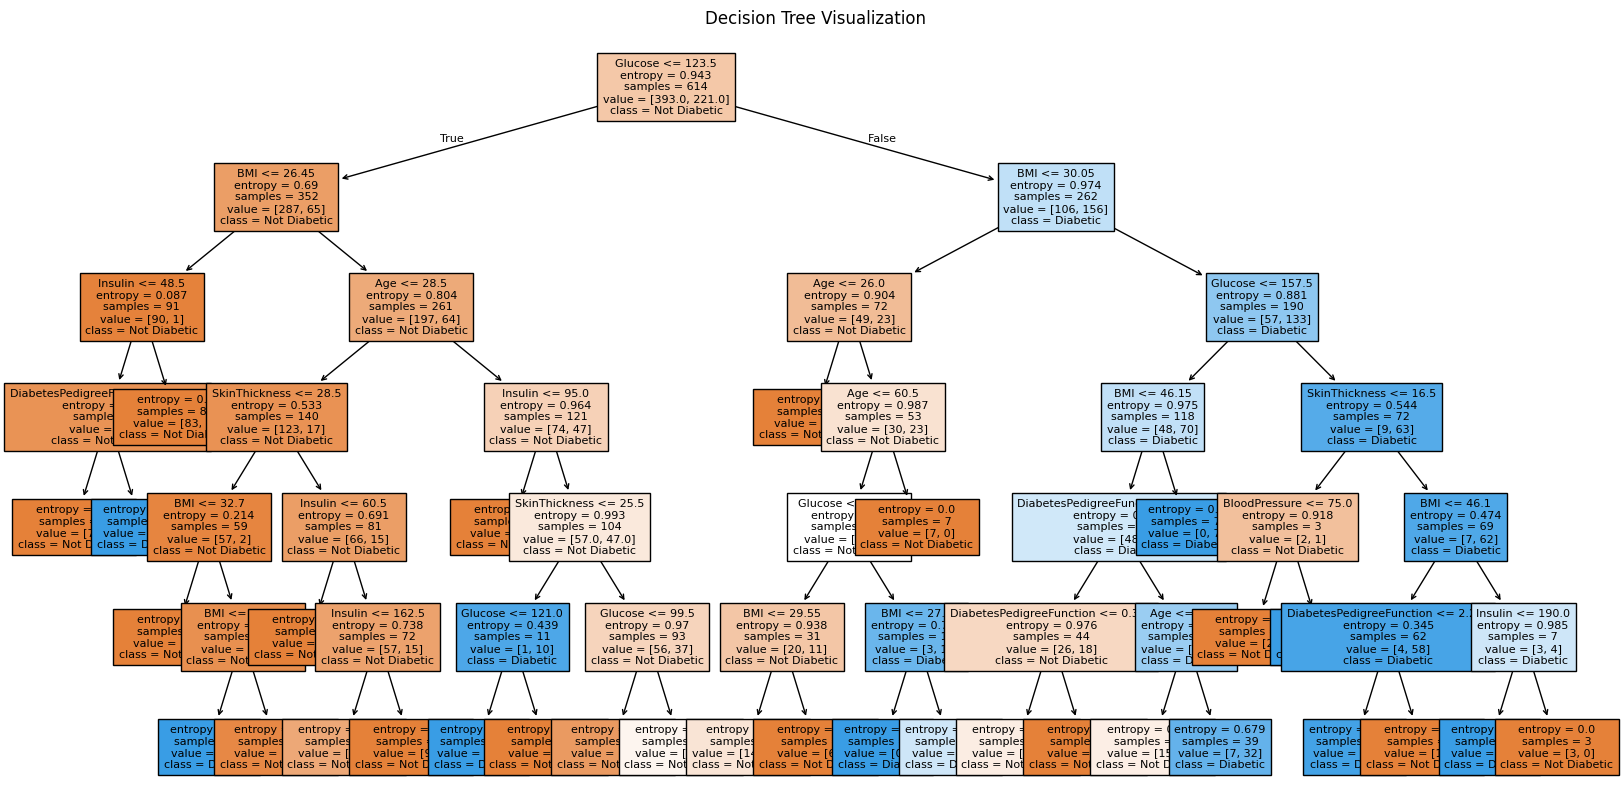

In [61]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dtree, feature_names=x_train.columns, class_names=['Not Diabetic', 'Diabetic'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

In [62]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import LabelEncoder
!pip install alibi
from alibi.explainers import ALE, plot_ale
from sklearn.inspection import permutation_importance
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d0fc1e13015851f350eac53a7ed20bcb5b7d6e7170e93757229bab31b0823cdb
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


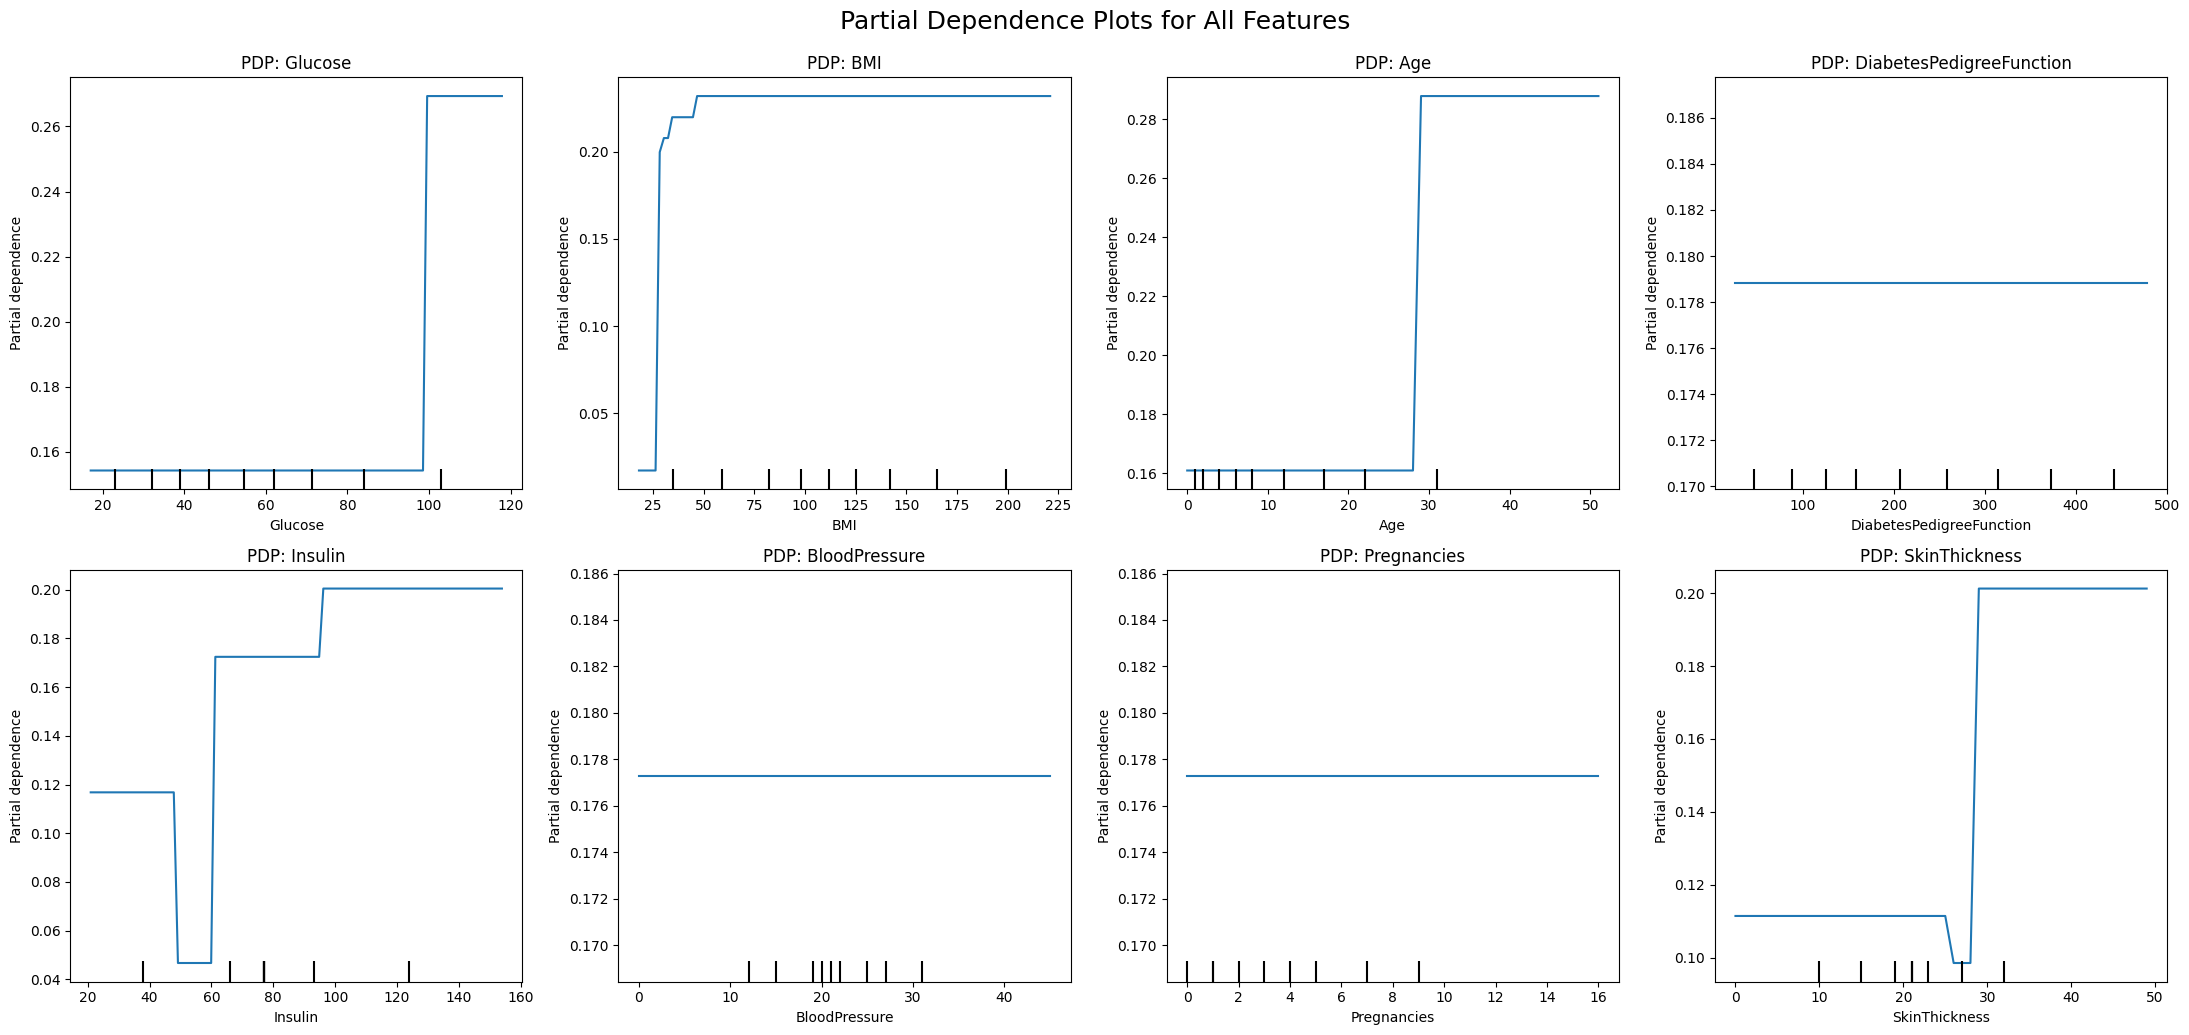

In [63]:
## PDP
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction',
            'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']

x_train_encoded = x_train.copy()

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
    x_train_encoded[feature] = data[feature]

    status_values = np.sort(data[feature].unique())
    original_labels = encoder.inverse_transform(status_values)

    PartialDependenceDisplay.from_estimator(
        dtree,
        x_train_encoded,
        features=[feature],
        feature_names=x_train_encoded.columns,
        ax=axes[i]
    )

    axes[i].set_xticks(status_values)
    axes[i].set_xticklabels(original_labels, rotation=45)
    axes[i].set_title(f'PDP: {feature}')
    axes[i].set_ylabel('Partial Dependence')
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Partial Dependence Plots for All Features", fontsize=18, y=1.03)
plt.show()

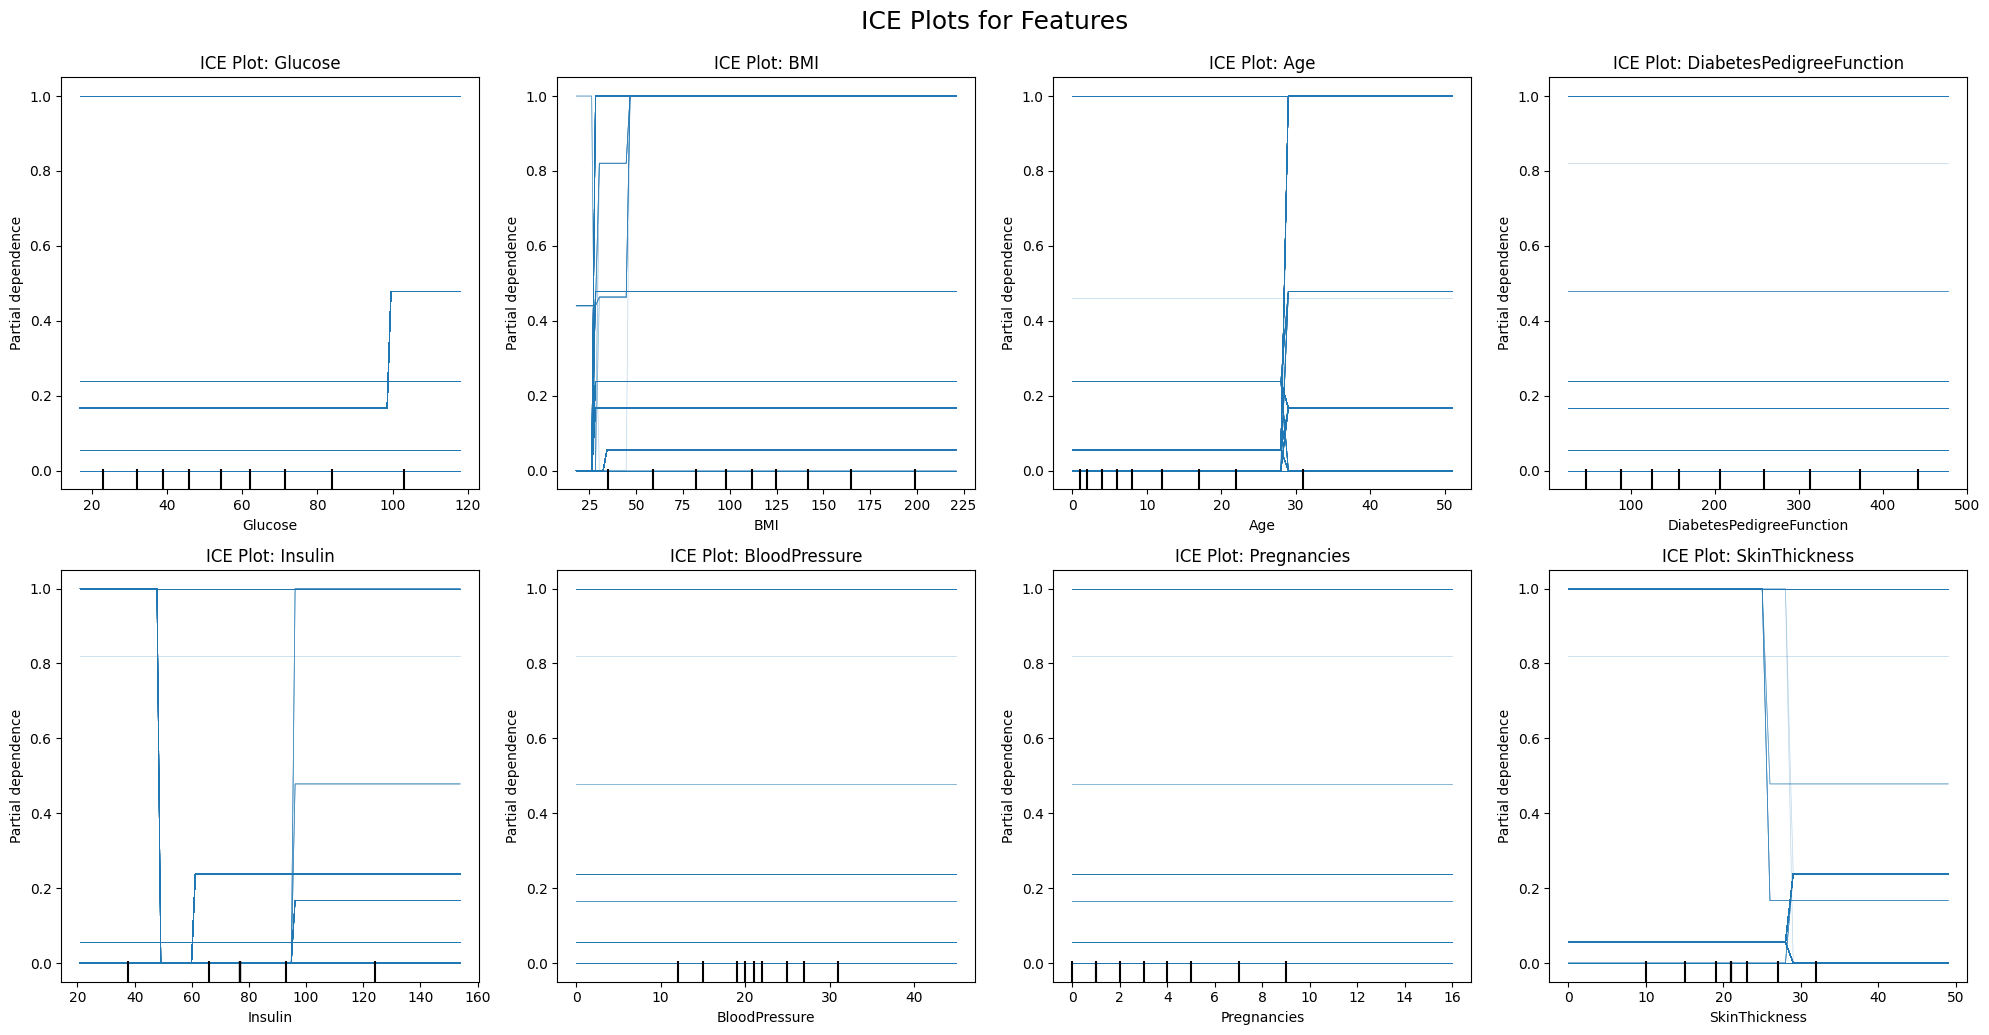

In [64]:
## ICE
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction',
            'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']

x_train_encoded = x_train.copy()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
    x_train_encoded[feature] = data[feature]


    status_values = np.sort(data[feature].unique())
    original_labels = encoder.inverse_transform(status_values)

    PartialDependenceDisplay.from_estimator(
        dtree,
        x_train_encoded,
        features=[feature],
        feature_names=x_train_encoded.columns,
        kind='individual',
        ax=axes[i]
    )

    axes[i].set_xticks(status_values)
    axes[i].set_xticklabels(original_labels, rotation=45)
    axes[i].set_title(f'ICE Plot: {feature}')
    axes[i].set_ylabel('Partial Dependence')
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("ICE Plots for Features", fontsize=18, y=1.03)
plt.show()

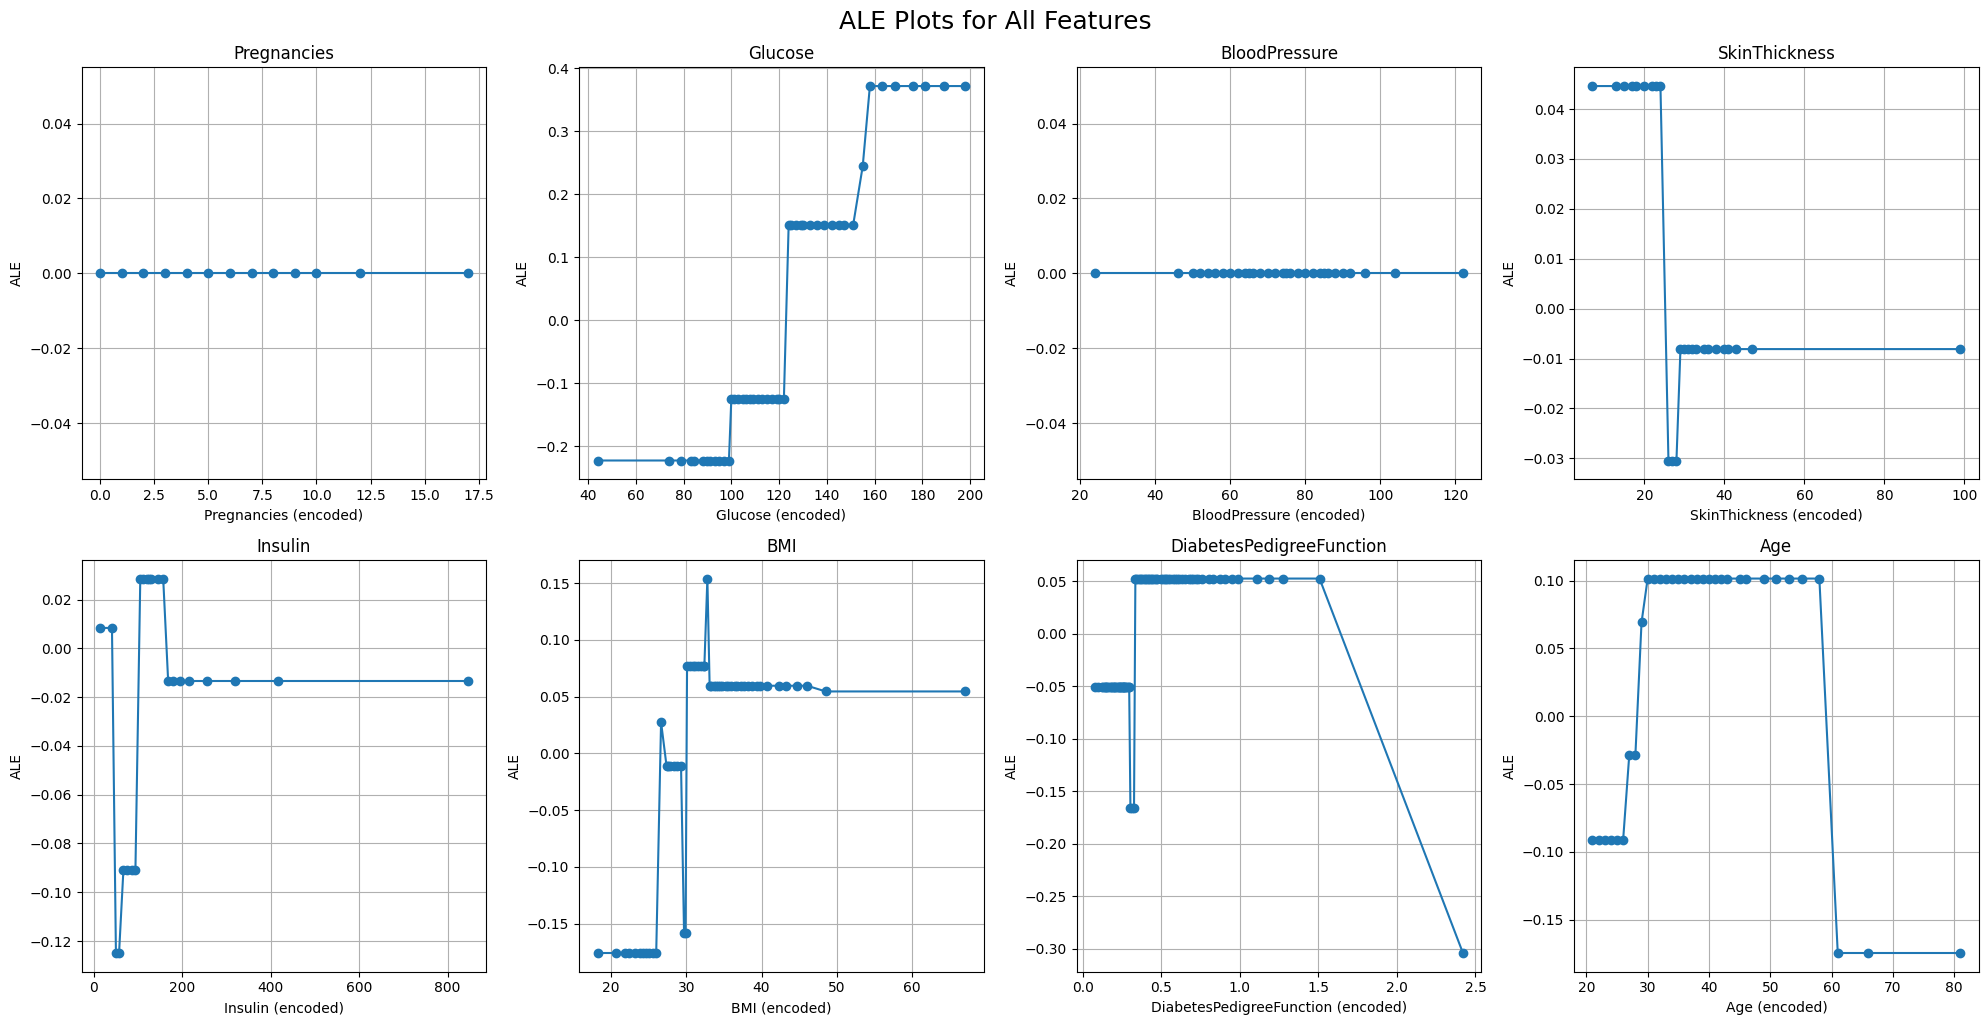

In [65]:
## ALE
feature_columns = x_train.columns.tolist()

def predict_proba_class1(X):
    X_df = pd.DataFrame(X, columns=feature_columns)
    return dtree.predict_proba(X_df)[:, 1]

ale_explainer = ALE(predict_proba_class1, feature_names=feature_columns)

ale_exp = ale_explainer.explain(x_train.to_numpy())

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature_name in enumerate(feature_columns):
    ax = axes[idx]
    feature_idx = feature_columns.index(feature_name)

    ax.plot(
        ale_exp.feature_values[feature_idx],
        ale_exp.ale_values[feature_idx],
        marker='o'
    )
    ax.set_title(feature_name)
    ax.set_xlabel(f"{feature_name} (encoded)")
    ax.set_ylabel("ALE")
    ax.grid(True)


plt.tight_layout()
plt.suptitle("ALE Plots for All Features", fontsize=18, y=1.02)
plt.show()

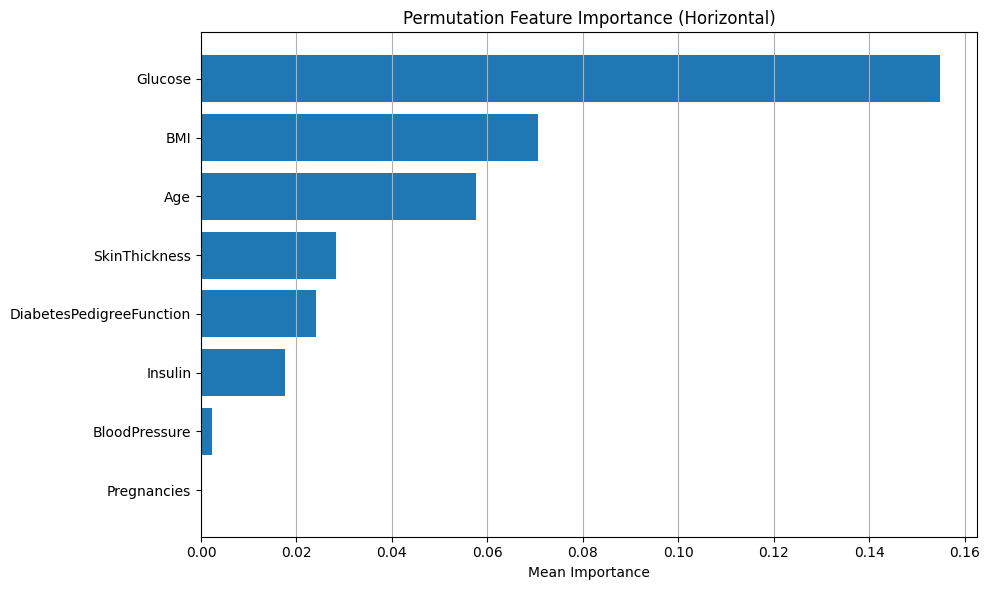

In [66]:
## PFI
result = permutation_importance(dtree, x_train, y_train, n_repeats=10, random_state=42)

importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Permutation Feature Importance (Horizontal)")
plt.barh(range(x_train.shape[1]), importances[indices], align="center")
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

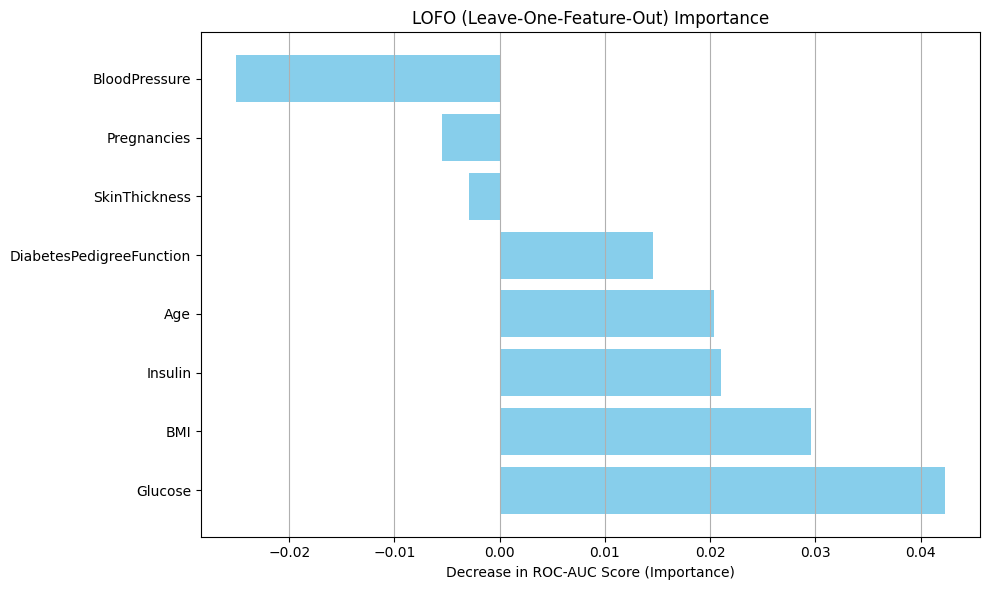

                    Feature  Importance
1                   Glucose    0.042277
5                       BMI    0.029544
4                   Insulin    0.021001
7                       Age    0.020398
6  DiabetesPedigreeFunction    0.014595
3             SkinThickness   -0.002948
0               Pregnancies   -0.005437
2             BloodPressure   -0.025024


In [67]:
## LOFO
from sklearn.model_selection import cross_val_score

def lofo_importance(model, X, y, cv=5):
    base_score = np.mean(cross_val_score(model, X, y, cv=cv, scoring='roc_auc'))

    importance = {}

    for feature in X.columns:
        X_copy = X.drop(columns=[feature])
        score = np.mean(cross_val_score(model, X_copy, y, cv=cv, scoring='roc_auc'))
        importance[feature] = base_score - score

    importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
    return importance_df.sort_values(by='Importance', ascending=False)

lofo_df = lofo_importance(dtree, x_train, y_train)

plt.figure(figsize=(10, 6))
plt.barh(lofo_df['Feature'], lofo_df['Importance'], color='skyblue')
plt.xlabel('Decrease in ROC-AUC Score (Importance)')
plt.title('LOFO (Leave-One-Feature-Out) Importance')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(lofo_df)

In [68]:
## Lime
feature_names = x_train.columns.tolist()

explainer = LimeTabularExplainer(training_data=x_train.values, mode='classification', feature_names=feature_names )

exp = explainer.explain_instance( x_train.iloc[0] .values, dtree.predict_proba, num_features=len(feature_names))
exp.show_in_notebook()